In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2025-06-17_twoBunch_forMuons_6GeV.yml")

importedDefaultSettings = importedDefaultSettings | { "L3PhaseSet" : 0.0 } 

In [3]:
csrTF = False
evalElement = "PENT"



inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e3,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 1000.0
Beam created, written to /tmp/beams/activeBeamFile_17314688063912674577.h5, and reinit to tao


In [4]:
# OPTIONAL: disable all apertures. Very nonphysical, but I want to see if this solves some headaches
# totalNumElements = len(tao.lat_list("*", "ele.name"))
# for eleII in range(totalNumElements):
#     try:
#         tao.cmd(f"set ele {eleII} APERTURE_AT = NO_APERTURE")
#     except:
#         pass

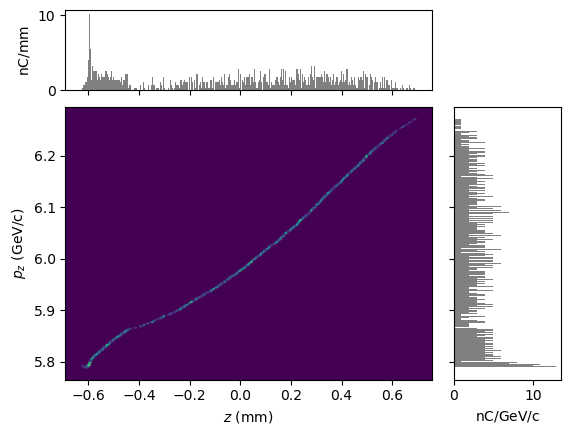

742.3059742845495


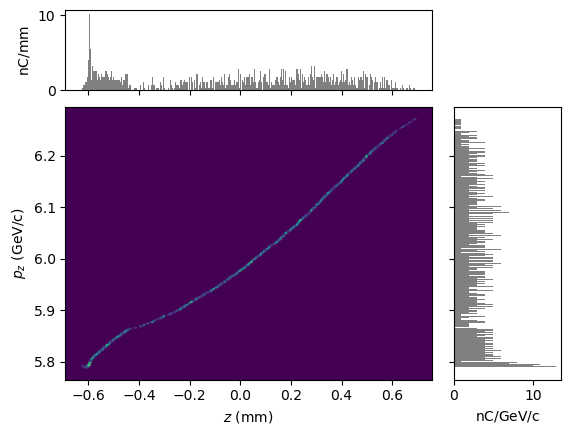

In [5]:
activeSettings = importedDefaultSettings | { "L1PhaseSet" : -20, "L2PhaseSet" : -45 }

setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings)
P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))

PDrive, PWitness = getDriverAndWitness(P)
print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) ) 




In [6]:
results = []

for R56Set in np.arange( -20e-3, 20e-3, 0.1e-3):
    PMod = P.copy()
    
    meanPz = np.mean( PMod.pz ) 
    PMod.z = PMod.z + ( R56Set ) * ( PMod.pz - meanPz ) / meanPz
    
    #display(plotMod(PMod, 'z', 'pz', bins=300))
    #plt.clf()
    
    PDrive, PWitness = getDriverAndWitness(PMod)
    #print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) )

    results.append( [ R56Set, np.median(PDrive.z) - np.median(PWitness.z) ] ) 

[-0.018000000000000013, 3.952609505465386e-05]


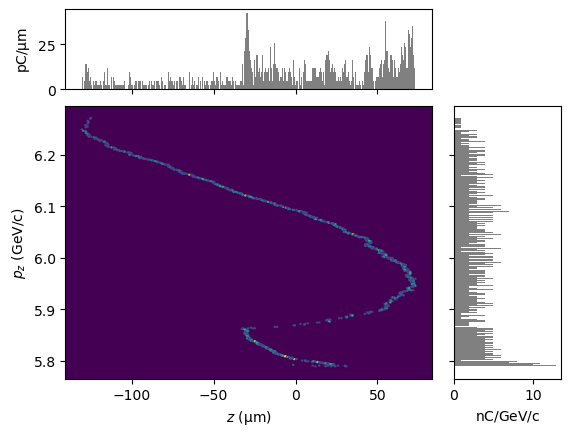

In [7]:
targetSpacing = 40e-6
bestResult = min(results, key=lambda x: ( x[1] - targetSpacing ) ** 2)
print(bestResult)
bestR56 = bestResult[0]


PMod = P.copy()
    
meanPz = np.mean( PMod.pz ) 
PMod.z = PMod.z + ( bestR56 ) * ( PMod.pz - meanPz ) / meanPz

display(plotMod(PMod, 'z', 'pz', bins=300))
plt.clf()


## Automate

-40 -50
[-0.0198, 4.297219658401616e-05]


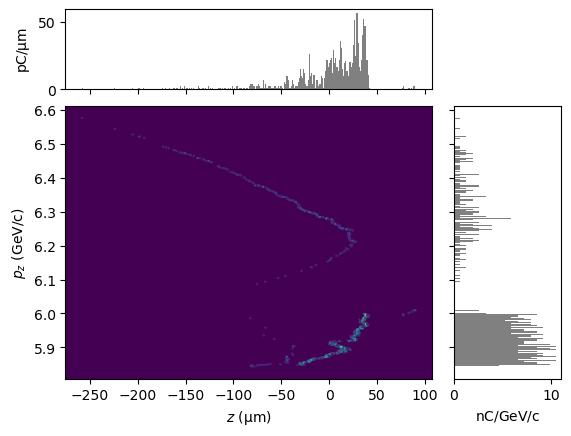

-40 -48
[-0.01830000000000001, 3.722189330205867e-05]


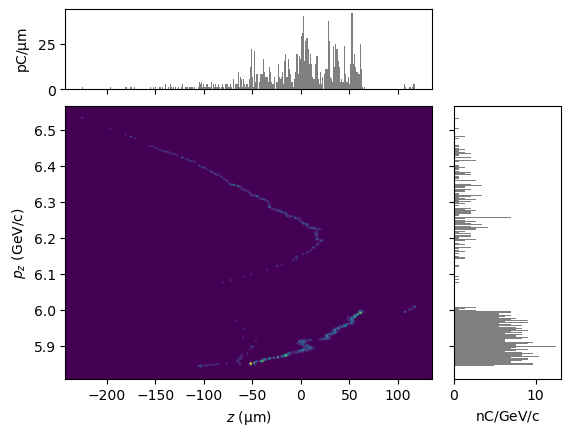

-40 -46
[-0.01680000000000002, 3.7796248352954835e-05]


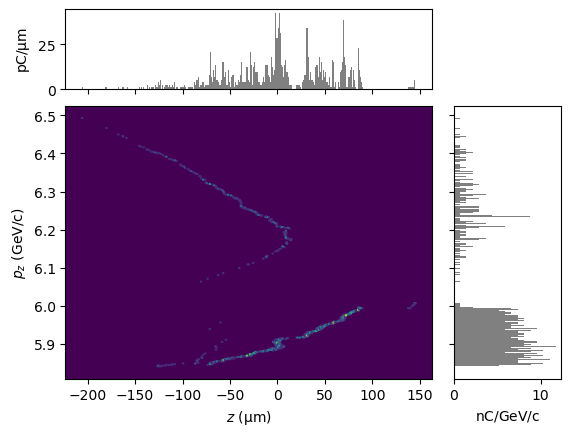

-40 -44
[-0.01510000000000003, 3.882086553606094e-05]


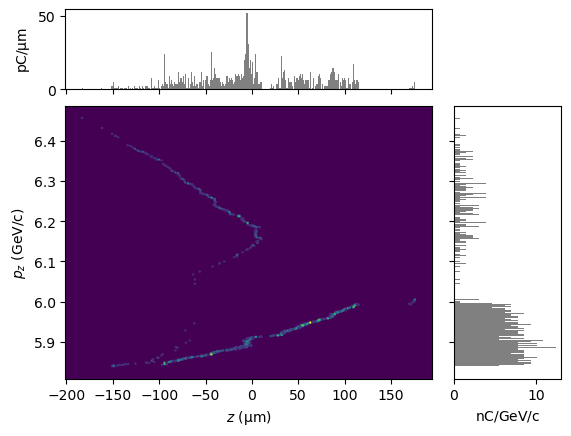

-40 -42
[-0.013300000000000041, 3.9280193780762395e-05]


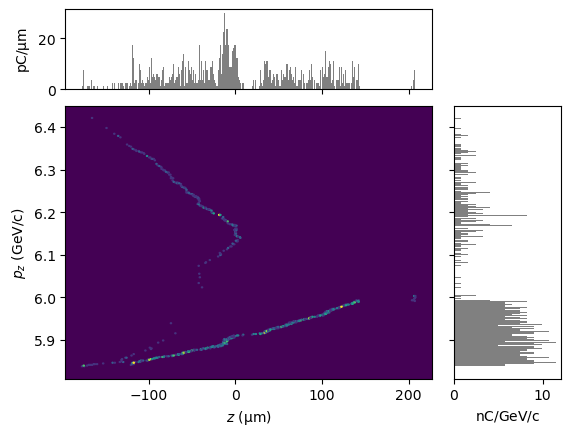

-40 -40
[-0.011400000000000052, 4.1130081393592286e-05]


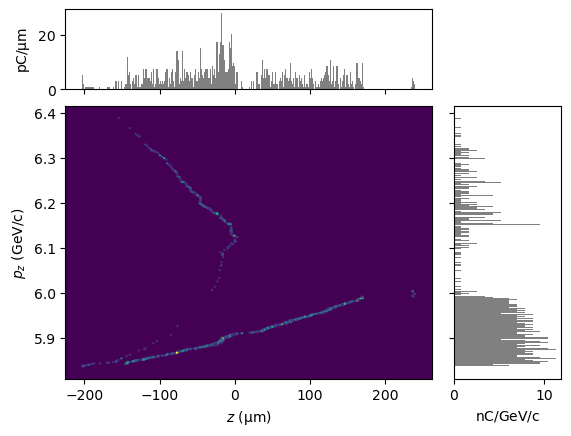

-40 -38
[-0.009300000000000065, 3.994308672238427e-05]


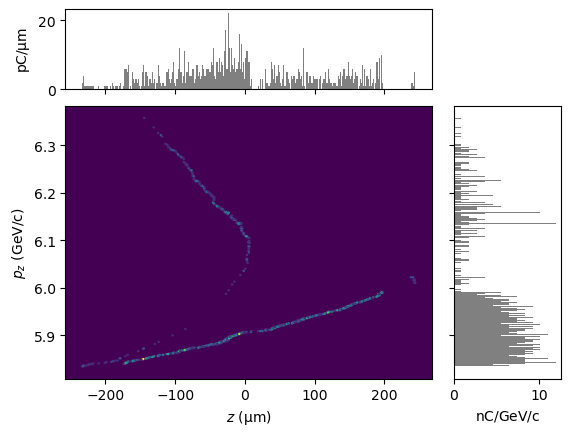

-40 -36
[-0.007500000000000076, 4.139867387309014e-05]


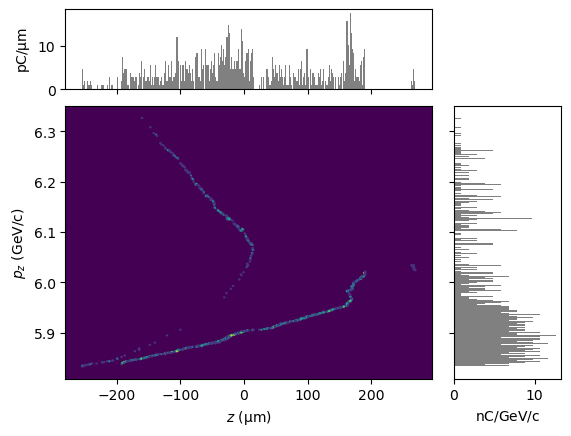

-40 -34
[-0.005500000000000088, 4.0354559538509236e-05]


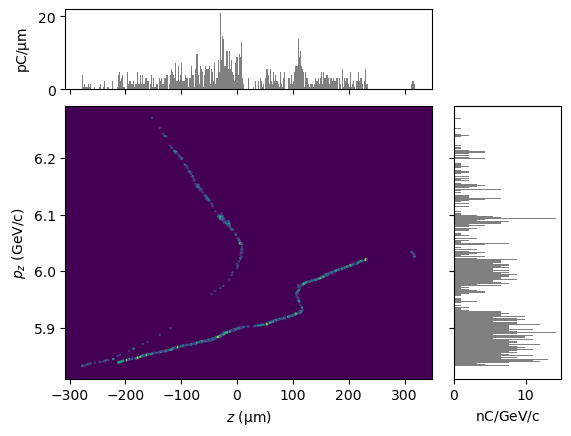

-40 -32
[-0.0023000000000001075, 4.118009322377532e-05]


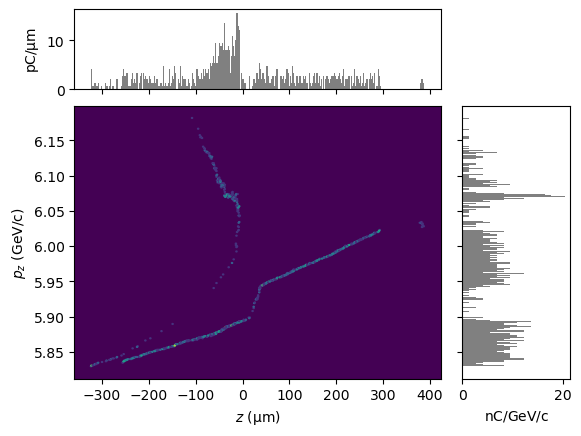

-40 -30
[0.0021999999999998653, 4.088497414024493e-05]


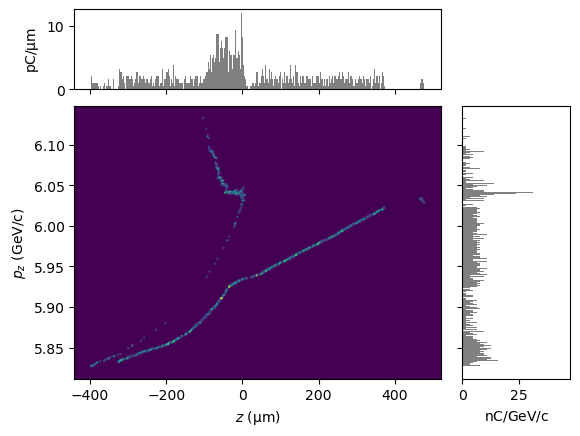

-40 -28
[0.010199999999999817, 4.062655541167854e-05]


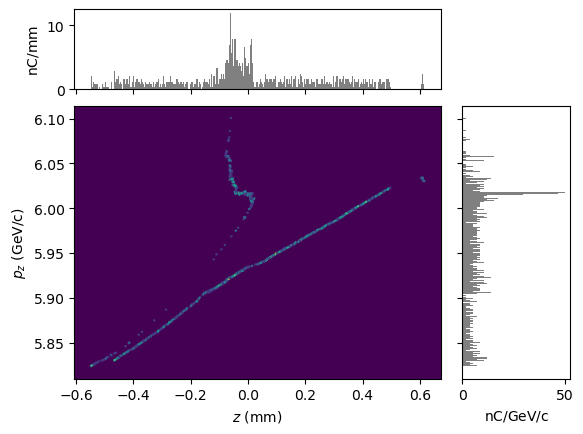

-40 -26
-40 -24
-40 -22
-40 -20
-40 -18
-40 -16
-40 -14
-40 -12
-40 -10
-40 -8
-40 -6
-40 -4
-40 -2
-38 -50
[-0.01840000000000001, 3.885499525405547e-05]


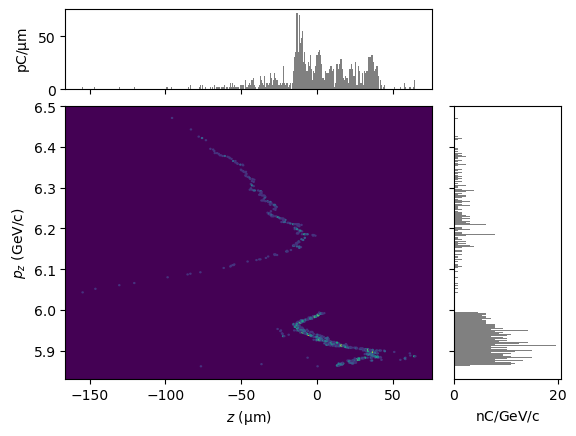

-38 -48
[-0.01680000000000002, 4.044890082010712e-05]


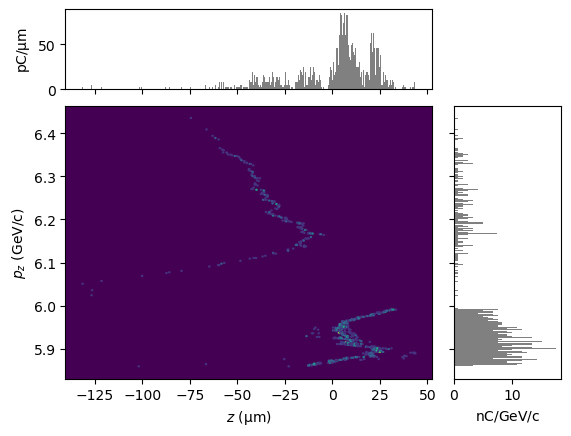

-38 -46
[-0.01500000000000003, 4.003342915457527e-05]


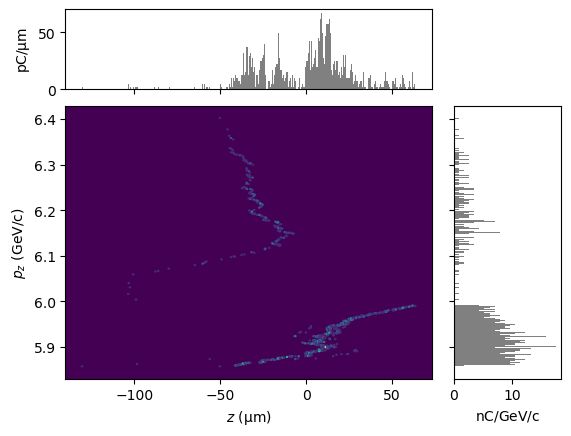

-38 -44
[-0.013200000000000042, 3.8640519560059116e-05]


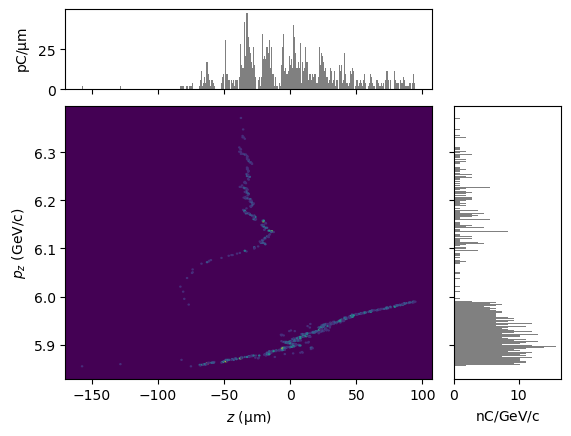

-38 -42
[-0.011300000000000053, 3.7978589990539233e-05]


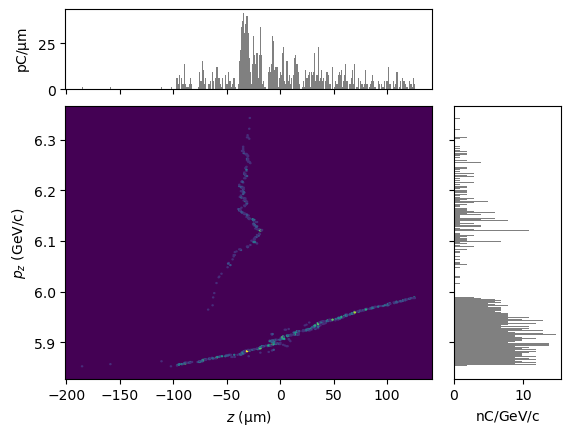

-38 -40
[-0.009300000000000065, 3.95888355569739e-05]


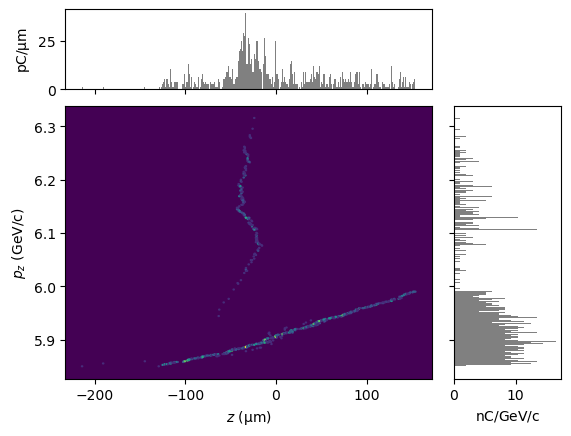

-38 -38
[-0.007300000000000077, 4.1909164282634e-05]


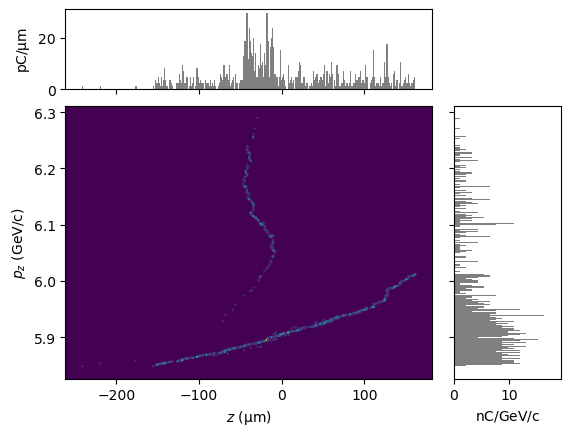

-38 -36
[-0.00520000000000009, 3.8887718496466e-05]


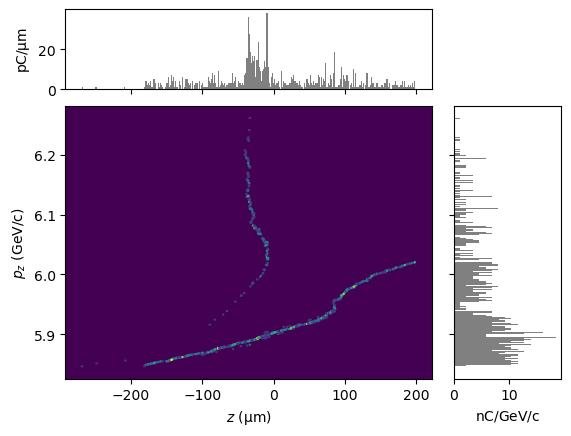

-38 -34
[-0.002700000000000105, 3.902280933458693e-05]


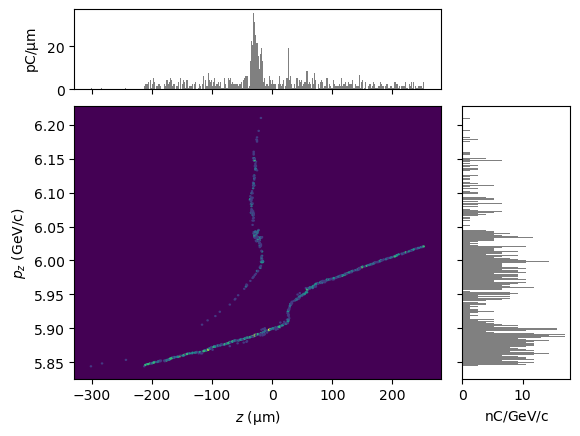

-38 -32
[0.00139999999999987, 4.043890136060675e-05]


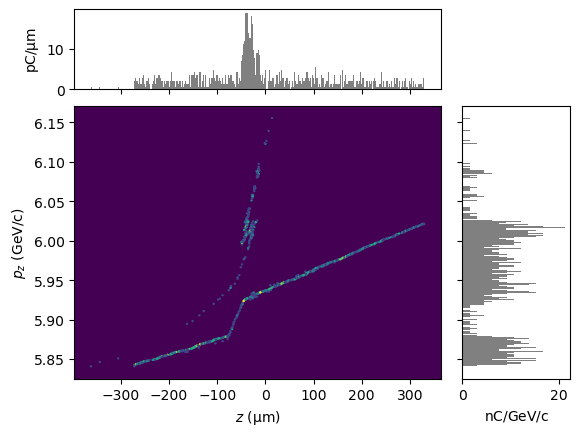

-38 -30
[0.010799999999999813, 4.008714905550085e-05]


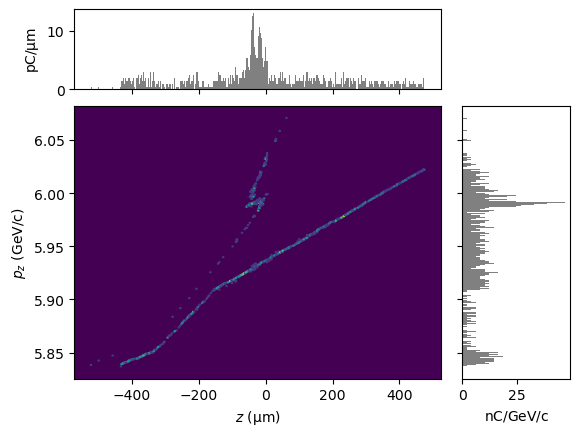

-38 -28
-38 -26
-38 -24
-38 -22
-38 -20
-38 -18
-38 -16
-38 -14
-38 -12
-38 -10
-38 -8
-38 -6
-38 -4
-38 -2
-36 -50
[-0.015700000000000026, 4.1732766808349185e-05]


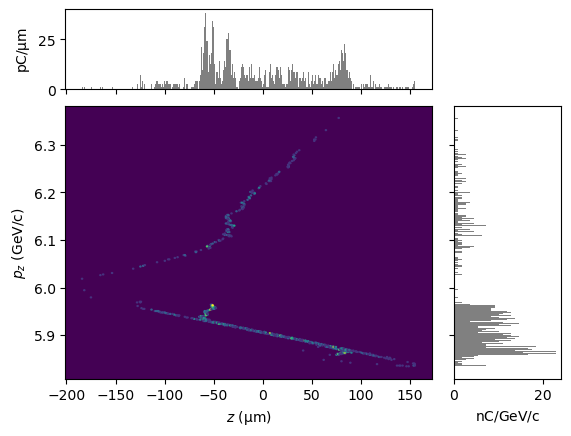

-36 -48
[-0.014300000000000035, 3.938525723800912e-05]


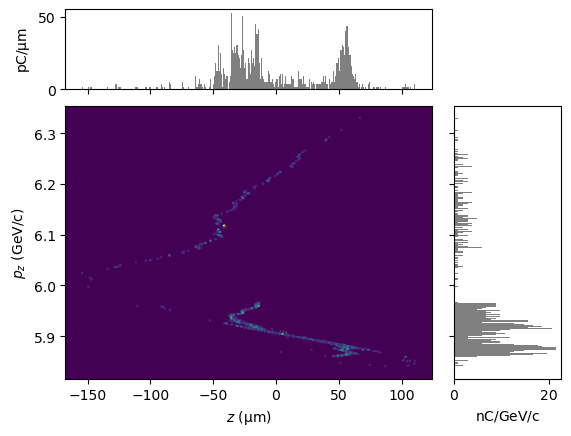

-36 -46
[-0.012000000000000049, 3.9787602988202945e-05]


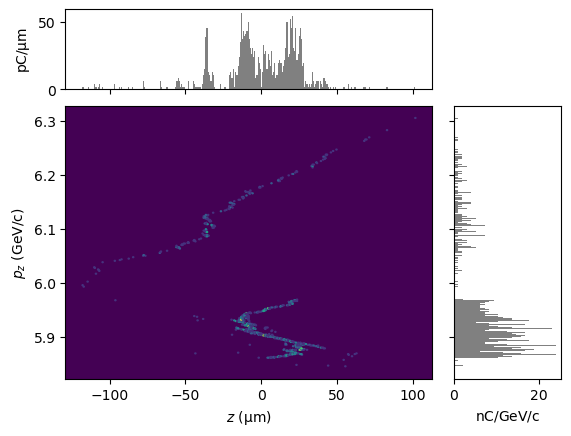

-36 -44
[-0.010000000000000061, 3.861192788977589e-05]


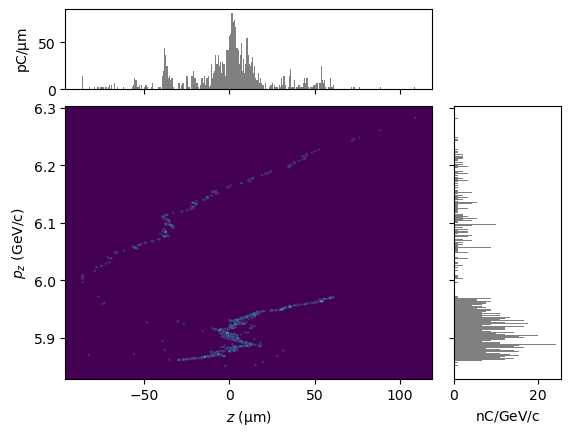

-36 -42
[-0.008100000000000072, 4.04313356464206e-05]


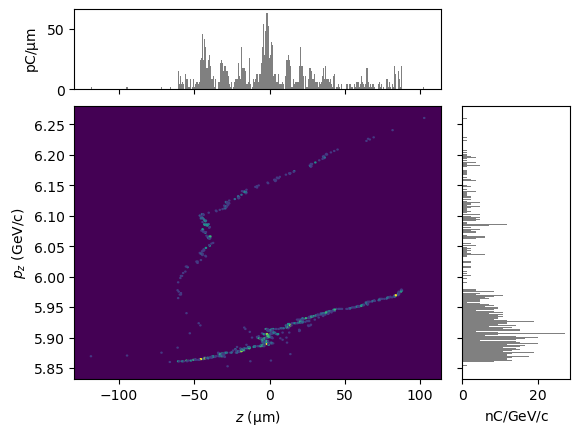

-36 -40
[-0.006400000000000083, 3.981304681700871e-05]


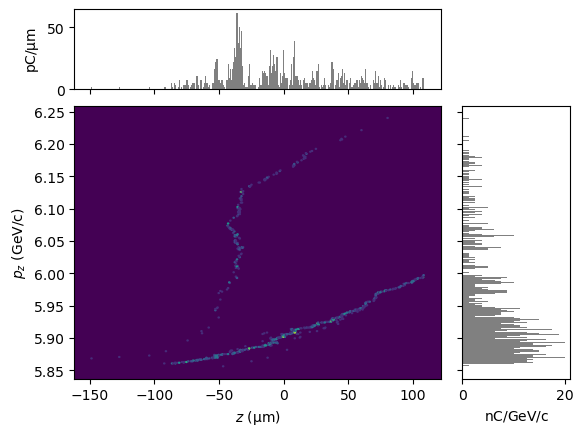

-36 -38
[-0.004500000000000094, 4.0582145417980173e-05]


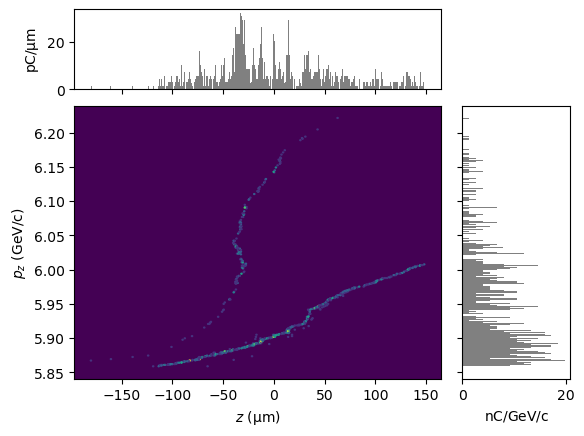

-36 -36
[-0.0017000000000001111, 4.040796175787077e-05]


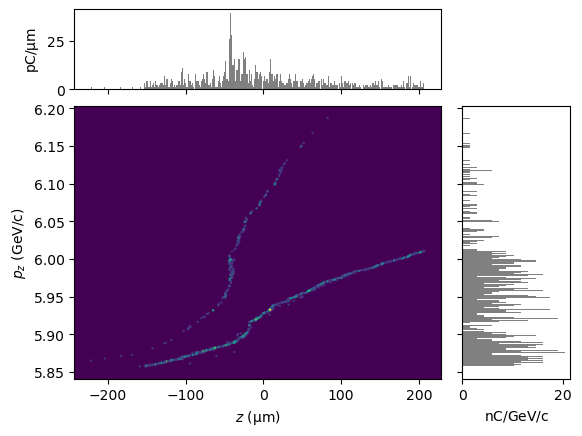

-36 -34
[0.011999999999999806, 4.0146413314426194e-05]


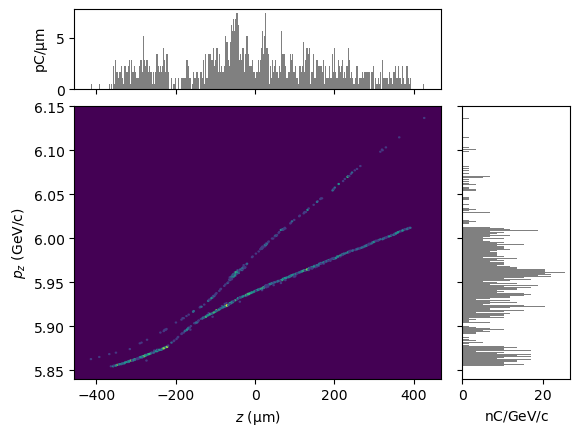

-36 -32
-36 -30
-36 -28
-36 -26
-36 -24
-36 -22
-36 -20
-36 -18
-36 -16
-36 -14
-36 -12
-36 -10
-36 -8
-36 -6
-36 -4
-36 -2
-34 -50
[-0.010900000000000055, 4.004936060818857e-05]


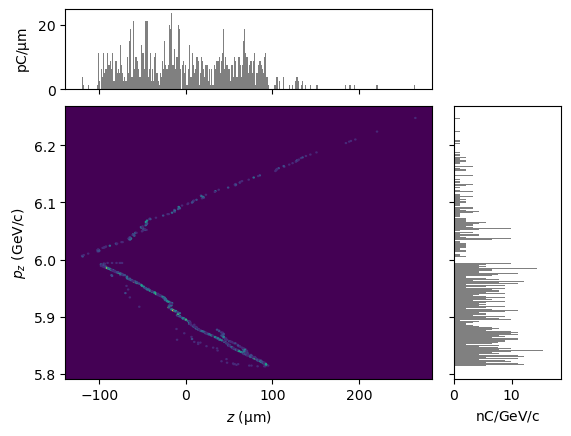

-34 -48
[-0.008000000000000073, 4.0469389351761865e-05]


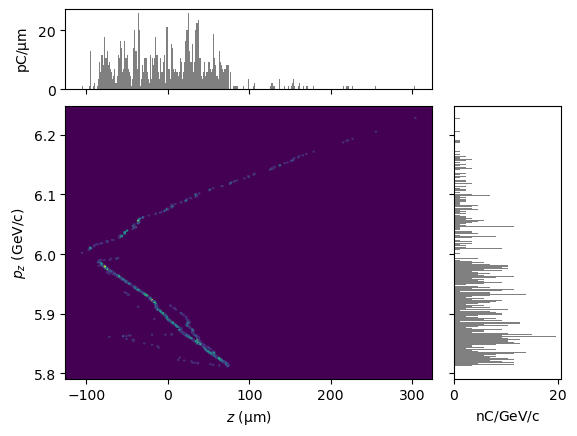

-34 -46
[-0.006000000000000085, 3.990648315135552e-05]


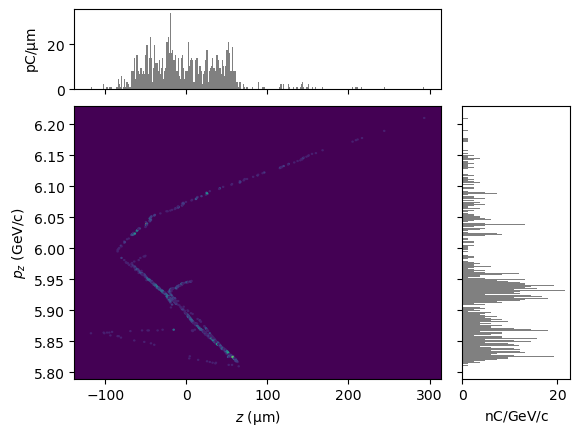

-34 -44
[-0.004700000000000093, 3.872826956872521e-05]


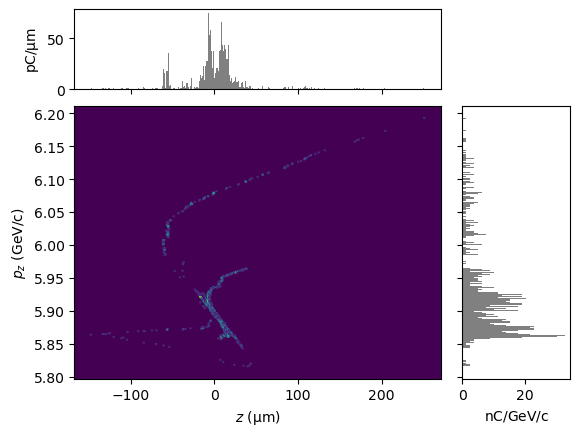

-34 -42
[-0.005100000000000091, 3.994570220229456e-05]


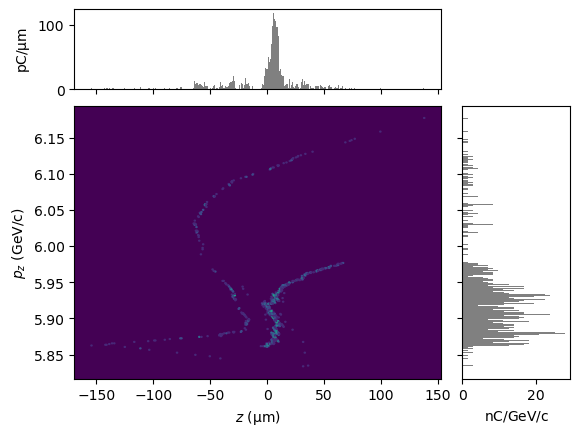

-34 -40
[-0.017500000000000016, 3.996687870417262e-05]


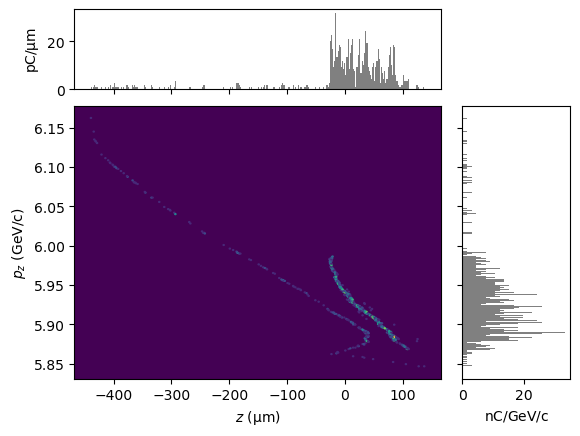

-34 -38
-34 -36
-34 -34
-34 -32
-34 -30
-34 -28
-34 -26
-34 -24
-34 -22
-34 -20
-34 -18
-34 -16
-34 -14
-34 -12
-34 -10
-34 -8
-34 -6
-34 -4
-34 -2
-32 -50
[-0.01170000000000005, 3.997578122889238e-05]


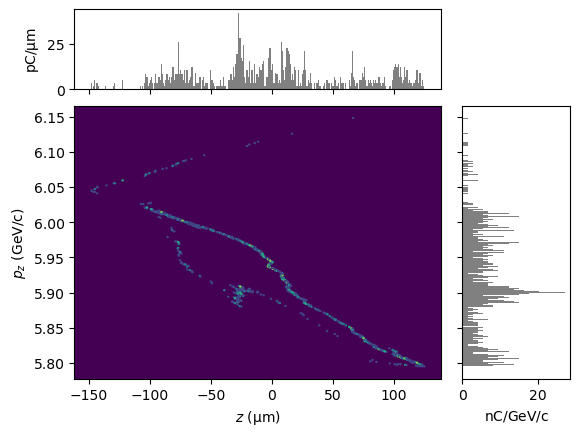

-32 -48
[-0.00840000000000007, 4.0238953305371204e-05]


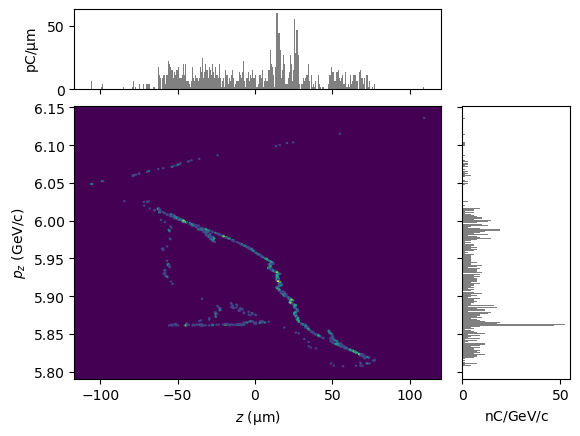

-32 -46
[-0.012800000000000044, 3.990698516339391e-05]


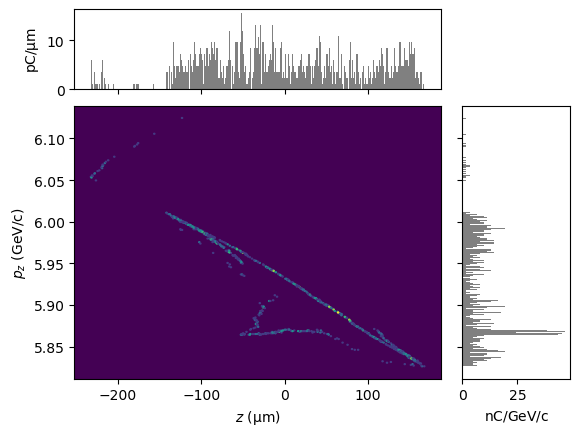

-32 -44
[-0.01860000000000001, 3.968221274066114e-05]


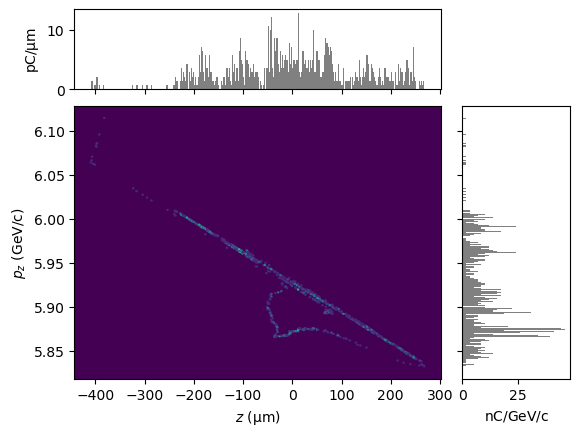

-32 -42
-32 -40
-32 -38
-32 -36
-32 -34
-32 -32
-32 -30
-32 -28
-32 -26
-32 -24
-32 -22
-32 -20
-32 -18
-32 -16
-32 -14
-32 -12
-32 -10
-32 -8
-32 -6
-32 -4
-32 -2
-30 -50
[-0.008200000000000072, 4.0017614934308315e-05]


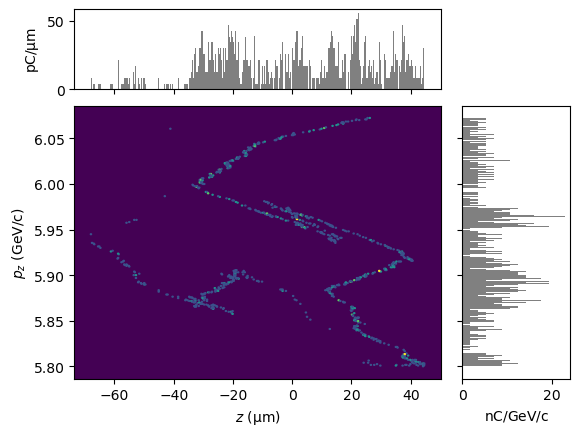

-30 -48
[-0.007700000000000075, 4.0541426171785304e-05]


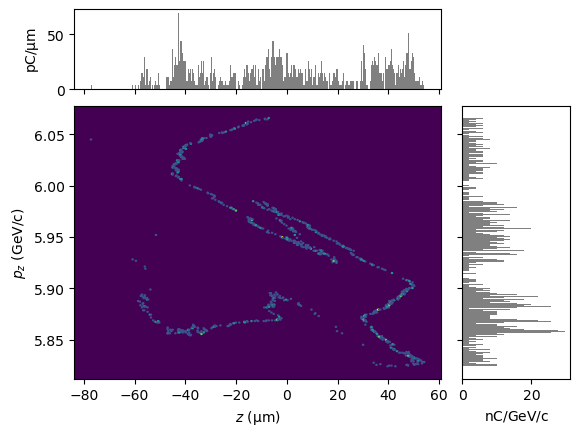

-30 -46
[-0.009000000000000067, 4.016072848965889e-05]


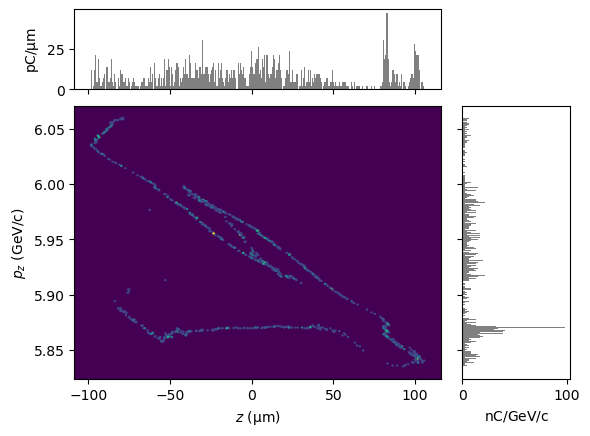

-30 -44
[-0.010800000000000056, 3.993985441074374e-05]


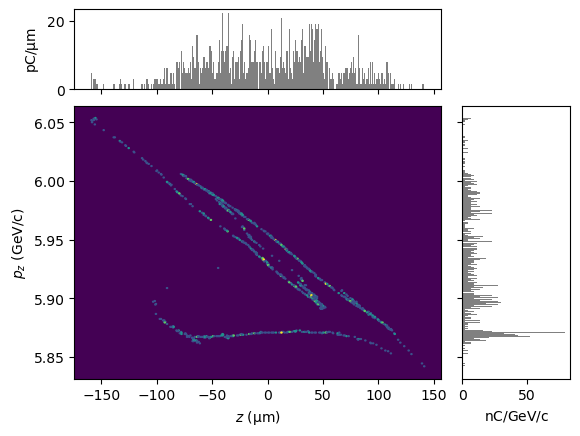

-30 -42
[-0.011000000000000055, 4.030138285755929e-05]


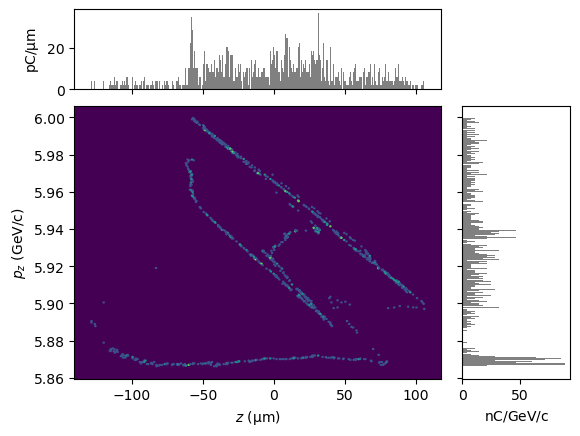

-30 -40
[-0.012300000000000047, 4.045060035890836e-05]


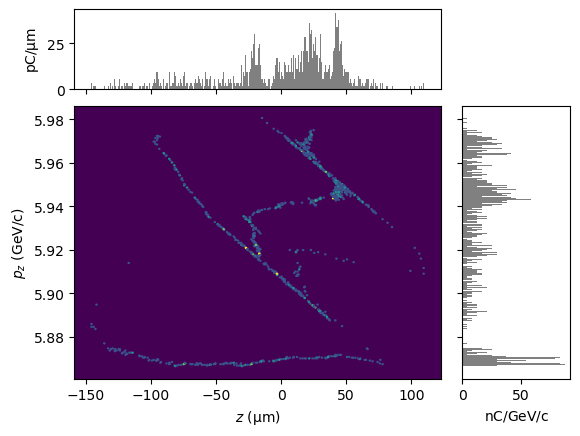

-30 -38
[-0.013300000000000041, 3.9760189499733944e-05]


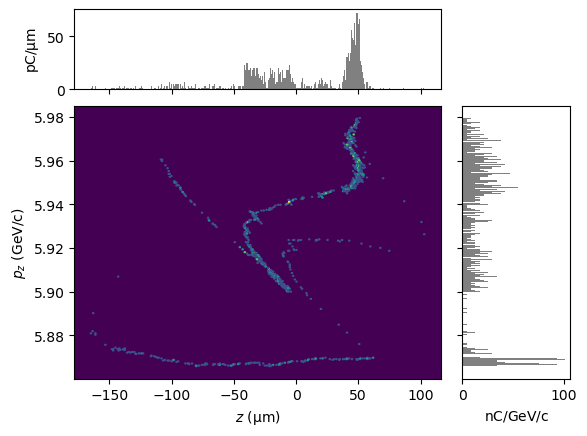

-30 -36
[-0.014300000000000035, 4.054317542165834e-05]


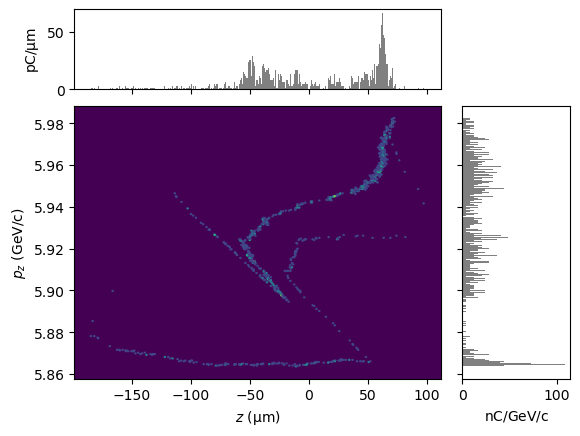

-30 -34
[-0.015900000000000025, 3.9698083319217965e-05]


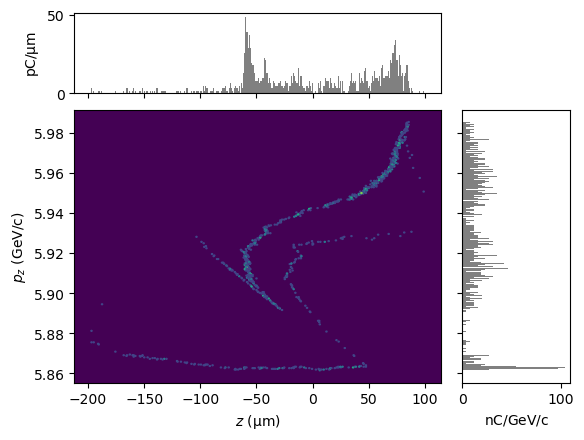

-30 -32
[-0.01700000000000002, 3.995975835902053e-05]


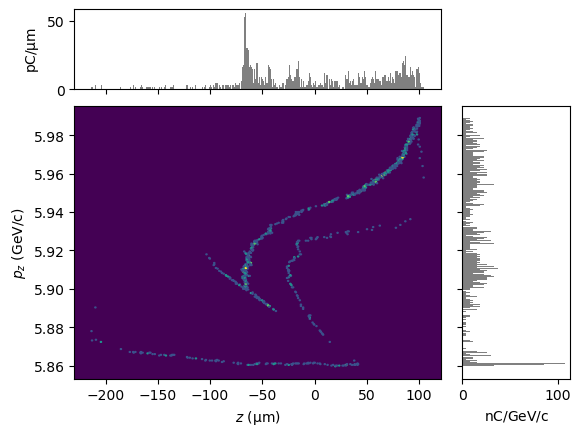

-30 -30
[-0.018000000000000013, 4.0232359933978425e-05]


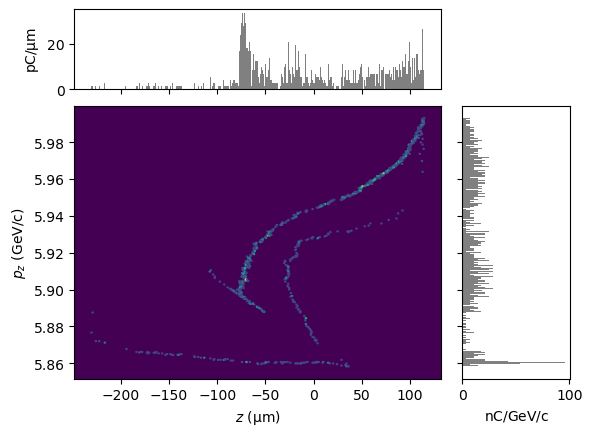

-30 -28
[-0.019200000000000005, 3.987758428222949e-05]


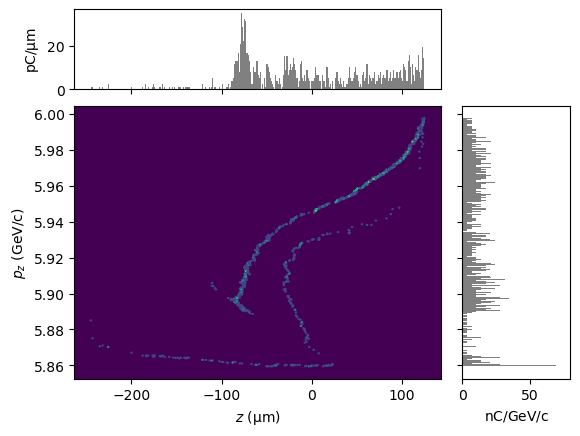

-30 -26
[-0.02, 4.044616213474153e-05]


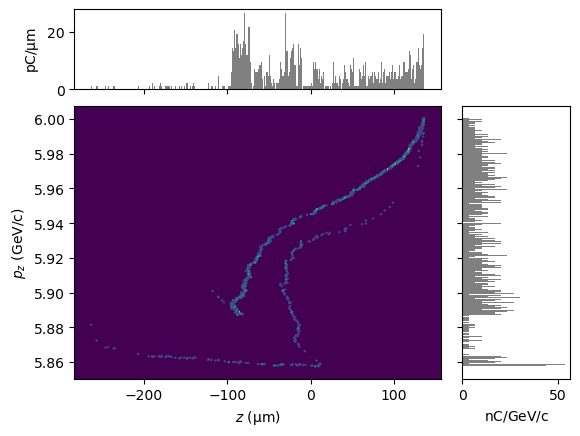

-30 -24
[-0.02, 4.9666635304986876e-05]


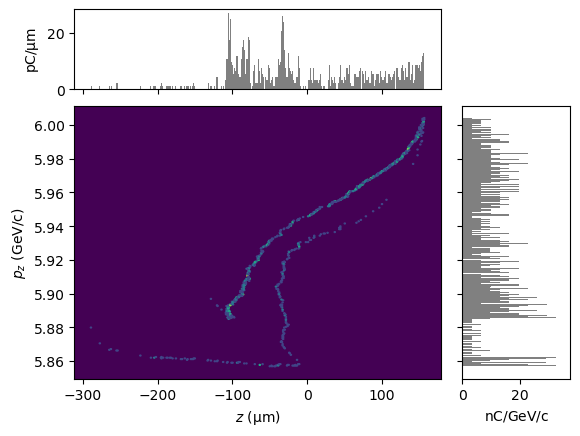

-30 -22
-30 -20
-30 -18
-30 -16
-30 -14
-30 -12
-30 -10
-30 -8
-30 -6
-30 -4
-30 -2
-28 -50
[-0.010300000000000059, 3.943590092258078e-05]


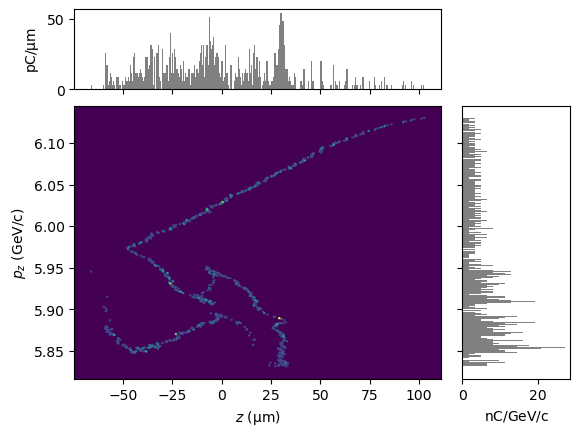

-28 -48
[-0.009700000000000063, 4.009721339786761e-05]


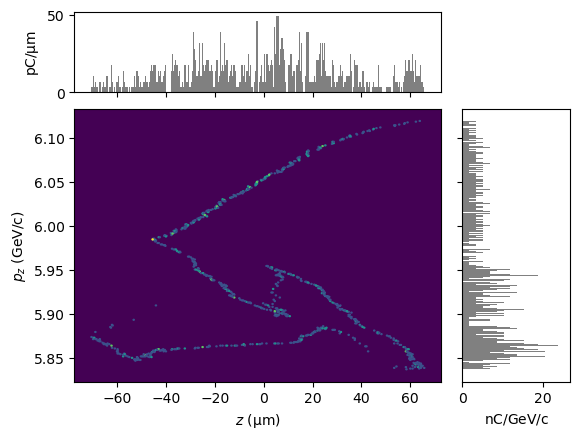

-28 -46
[-0.008900000000000068, 4.0012625071392184e-05]


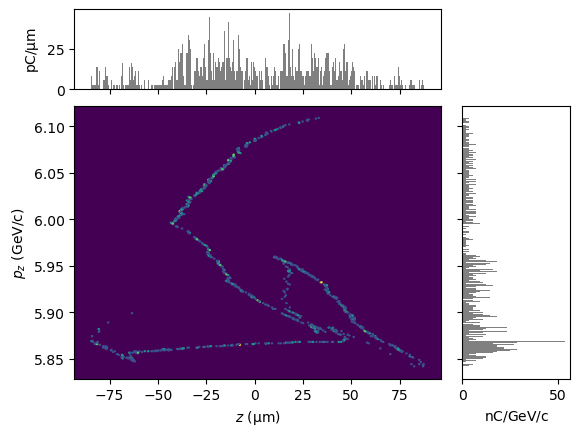

-28 -44
[-0.008800000000000068, 3.991780046766156e-05]


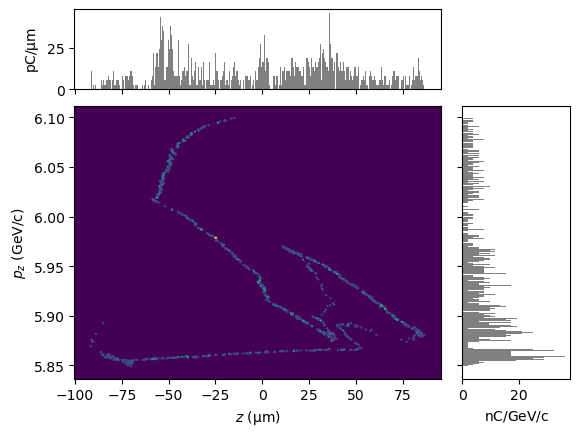

-28 -42
[-0.007800000000000074, 4.010578773577793e-05]


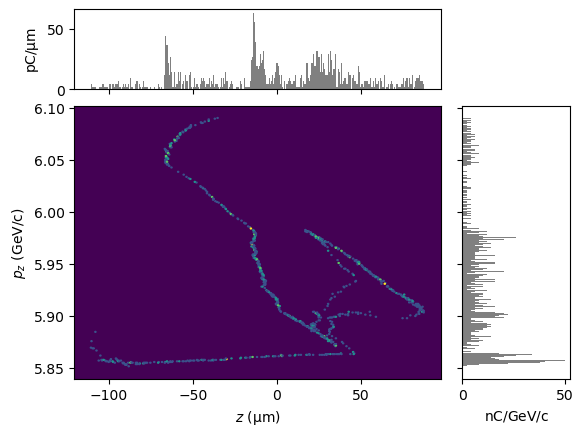

-28 -40
[-0.0071000000000000785, 3.99274634615921e-05]


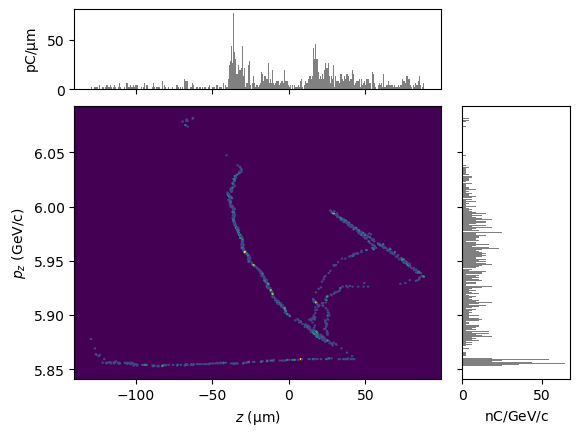

-28 -38
[-0.004500000000000094, 3.973943589775947e-05]


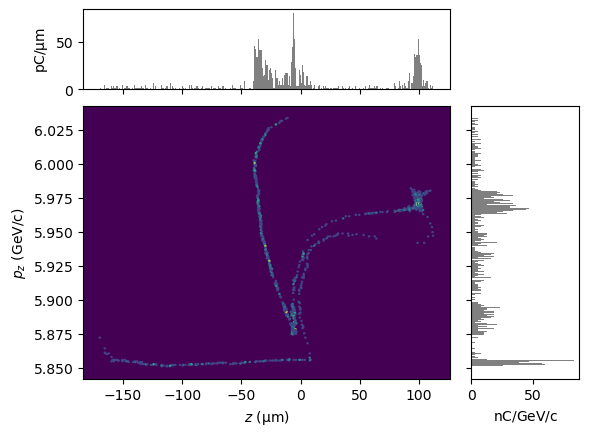

-28 -36
[-0.0016000000000001117, 3.990495690425052e-05]


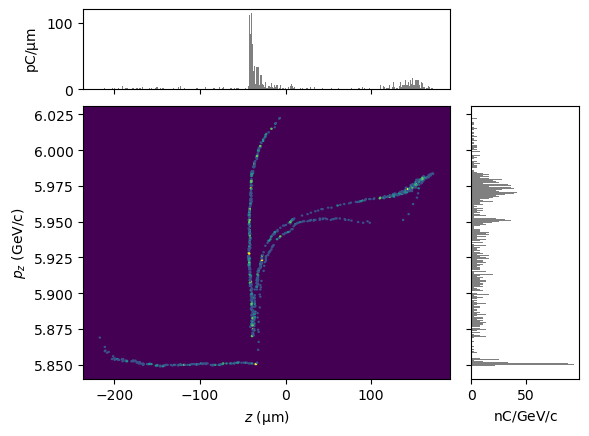

-28 -34
[0.00019999999999987736, 3.997695135330114e-05]


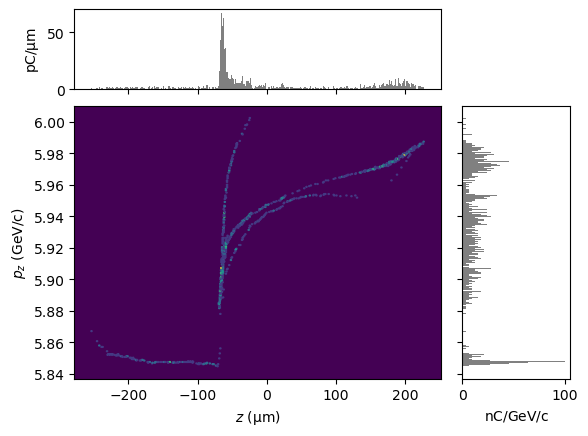

-28 -32
[0.003599999999999857, 4.0454286307724046e-05]


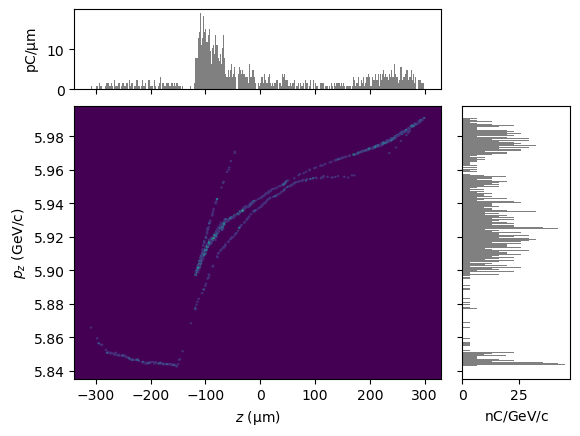

-28 -30
[0.010799999999999813, 3.998576794041947e-05]


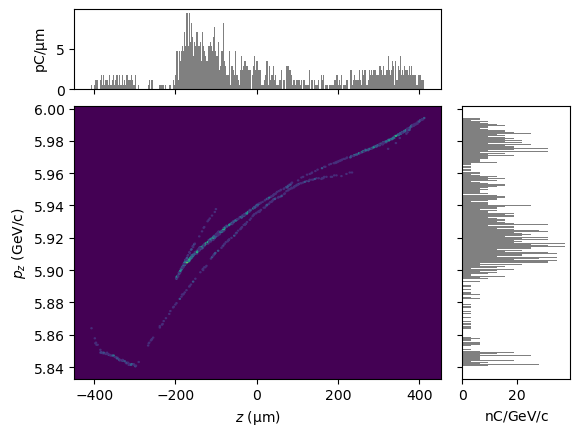

-28 -28
[0.019899999999999758, 3.62910147087463e-05]


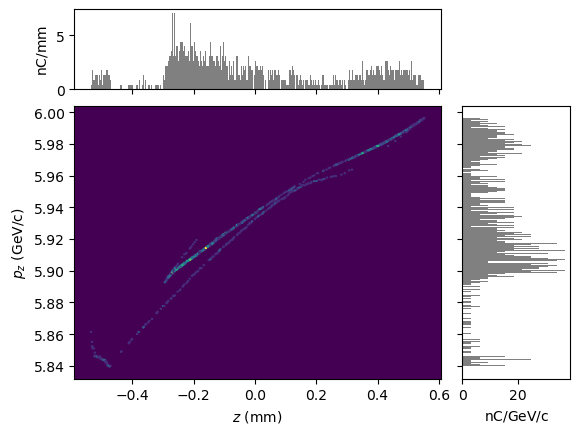

-28 -26
-28 -24
-28 -22
-28 -20
-28 -18
-28 -16
-28 -14
-28 -12
-28 -10
-28 -8
-28 -6
-28 -4
-28 -2
-26 -50
[-0.013900000000000037, 4.0825378146051855e-05]


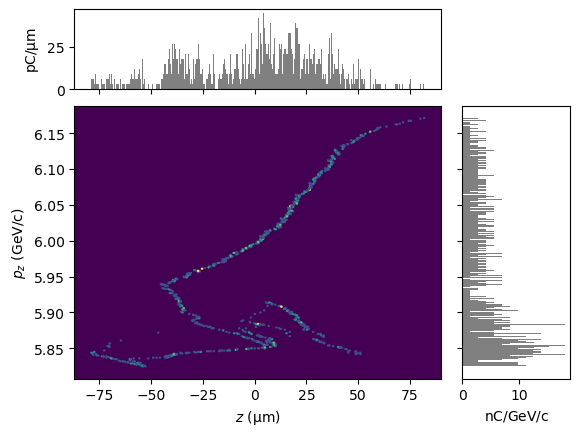

-26 -48
[-0.012200000000000048, 3.986022376002634e-05]


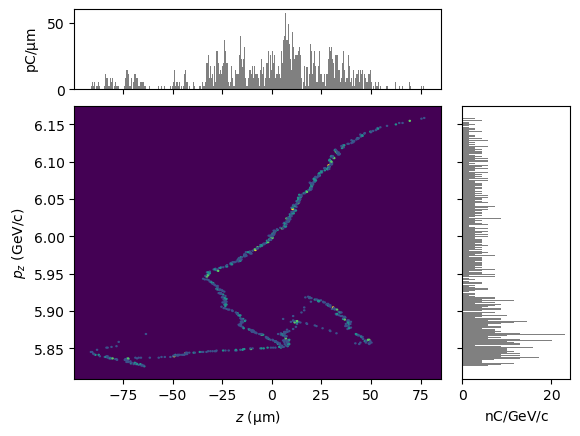

-26 -46
[-0.010400000000000059, 3.935730032461694e-05]


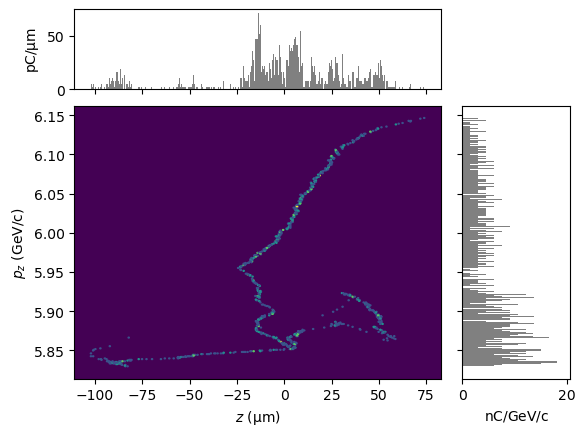

-26 -44
[-0.00850000000000007, 4.0771578146298556e-05]


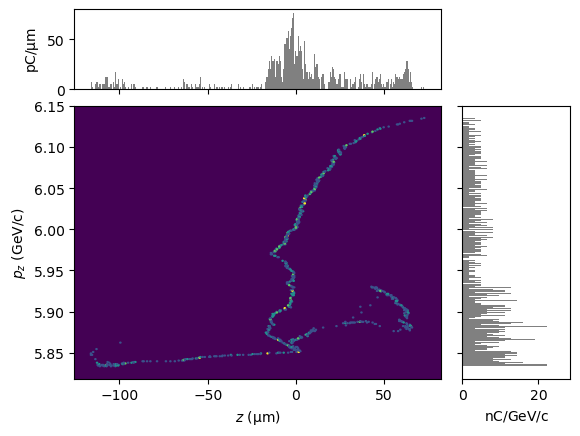

-26 -42
[-0.00690000000000008, 4.0880644844604256e-05]


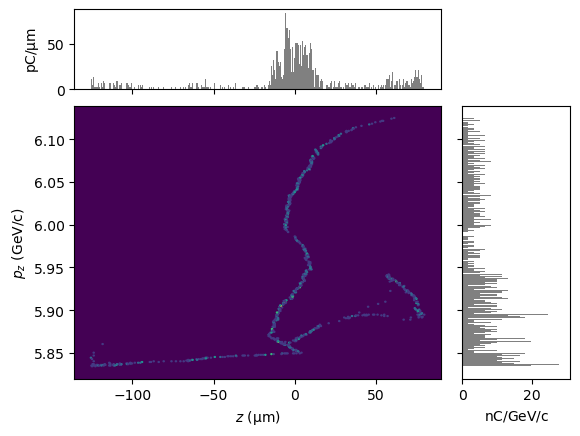

-26 -40
[-0.005400000000000089, 3.9259681676905276e-05]


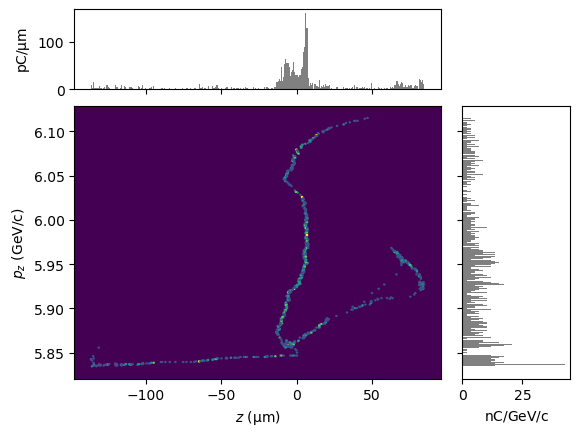

-26 -38
[-0.003400000000000101, 3.974691466043849e-05]


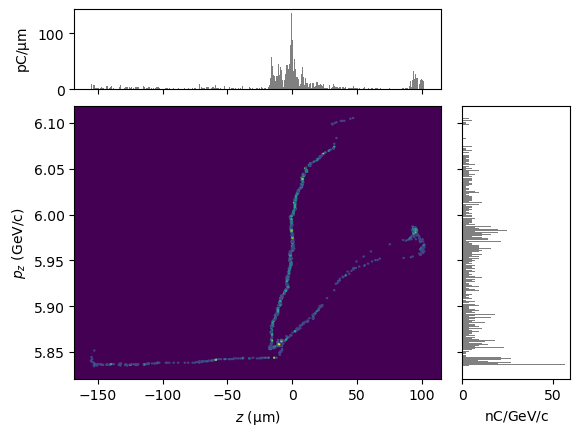

-26 -36
[-0.0012000000000001142, 4.1045287486945204e-05]


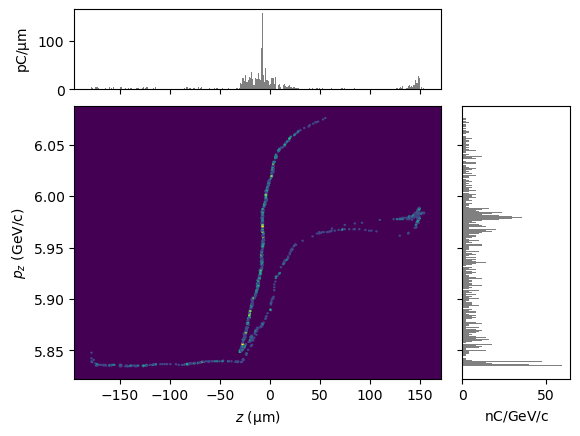

-26 -34
[0.0008999999999998731, 3.9249794520454965e-05]


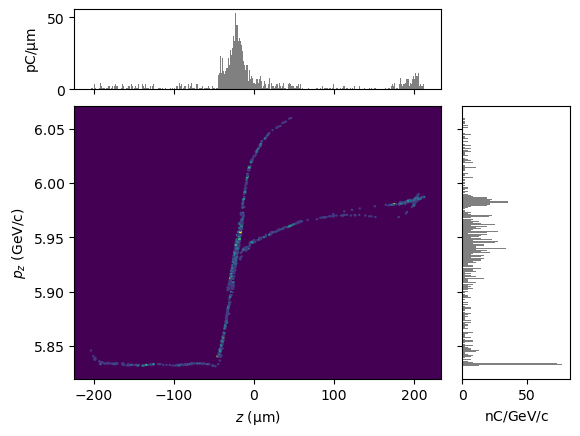

-26 -32
[0.016799999999999777, 3.995815959316102e-05]


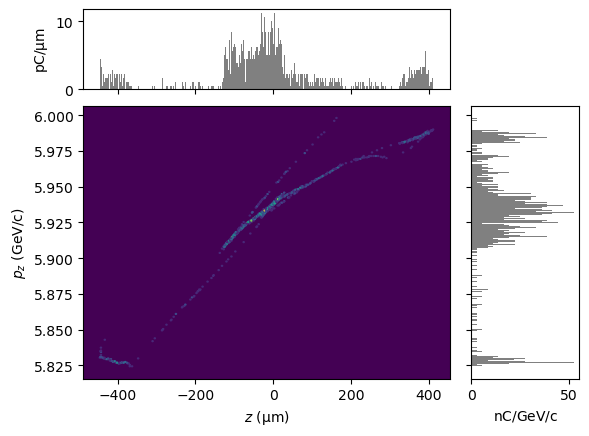

-26 -30
-26 -28
-26 -26
-26 -24
-26 -22
-26 -20
-26 -18
-26 -16
-26 -14
-26 -12
-26 -10
-26 -8
-26 -6
-26 -4
-26 -2
-24 -50
[-0.01680000000000002, 4.1281728369596624e-05]


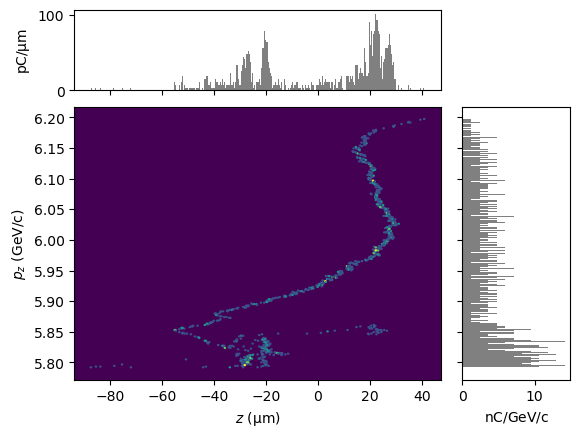

-24 -48
[-0.01500000000000003, 3.7788126024888575e-05]


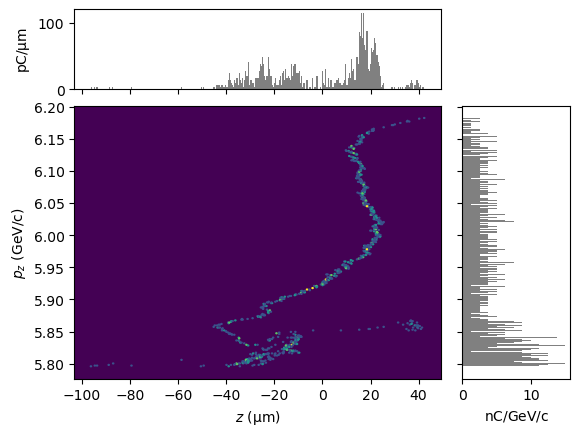

-24 -46
[-0.013000000000000043, 3.936454506831759e-05]


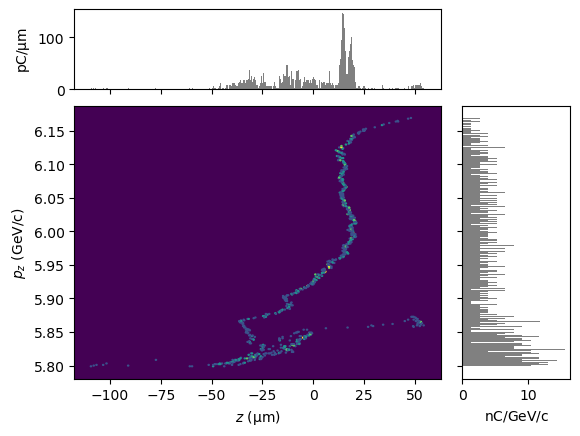

-24 -44
[-0.011000000000000055, 3.857222063954443e-05]


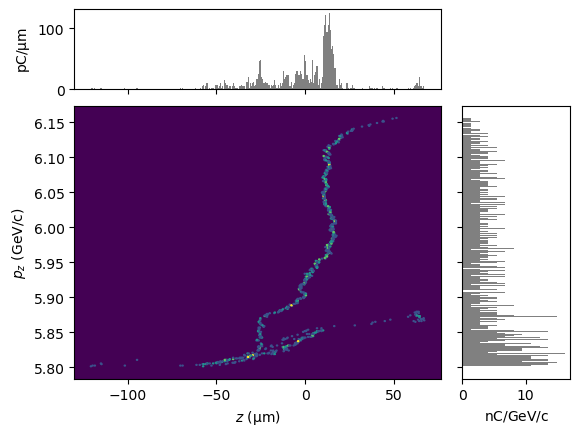

-24 -42
[-0.008900000000000068, 3.918501000313749e-05]


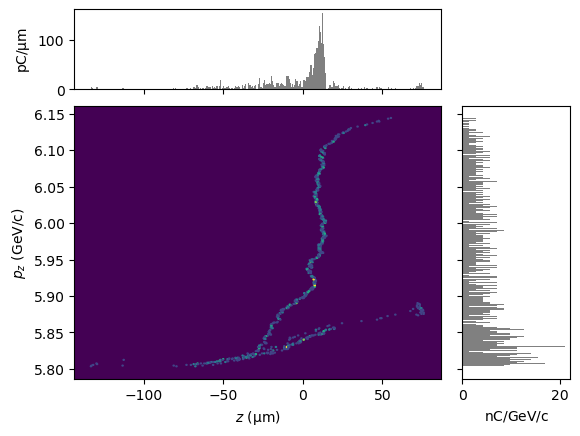

-24 -40
[-0.006700000000000081, 4.1383029707579705e-05]


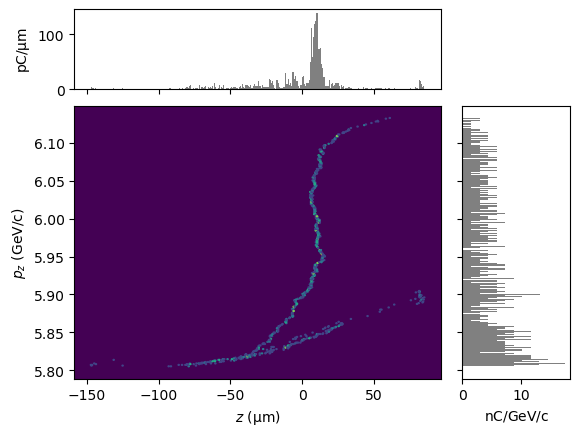

-24 -38
[-0.004600000000000094, 4.017482679463117e-05]


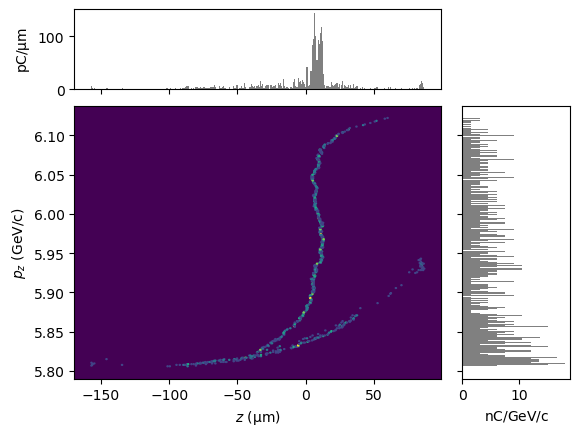

-24 -36
[-0.0025000000000001063, 3.9267789474720564e-05]


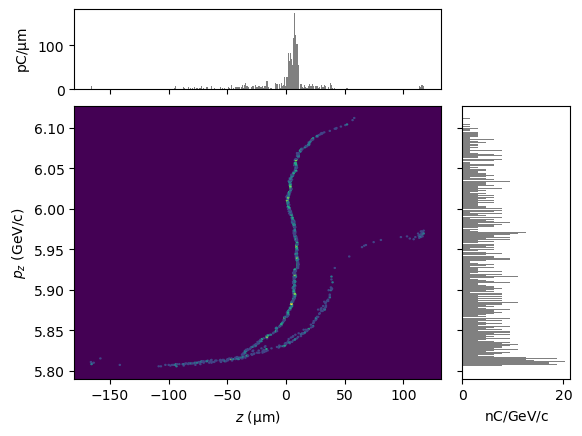

-24 -34
[-0.00010000000000012083, 4.0697775394320874e-05]


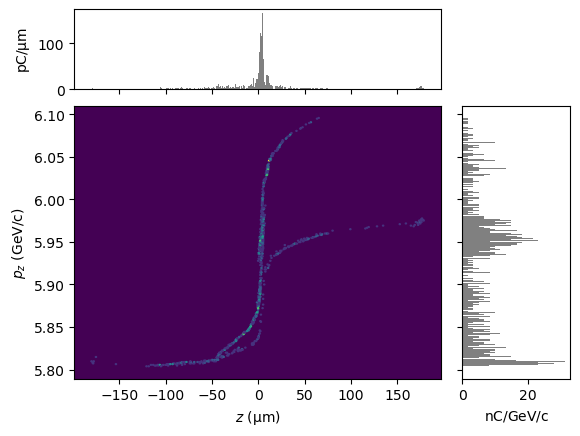

-24 -32
[0.007399999999999834, 3.974576432242317e-05]


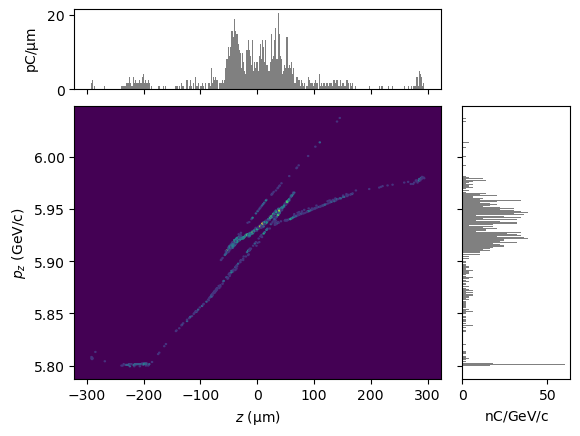

-24 -30
-24 -28
-24 -26
-24 -24
-24 -22
-24 -20
-24 -18
-24 -16
-24 -14
-24 -12
-24 -10
-24 -8
-24 -6
-24 -4
-24 -2
-22 -50
[-0.019700000000000002, 3.9860650736452206e-05]


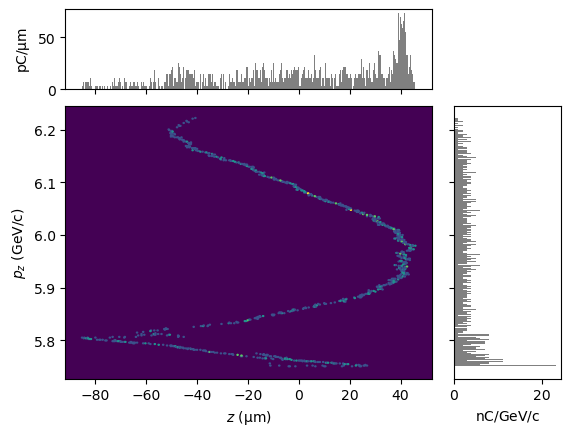

-22 -48
[-0.017500000000000016, 3.9304926904761375e-05]


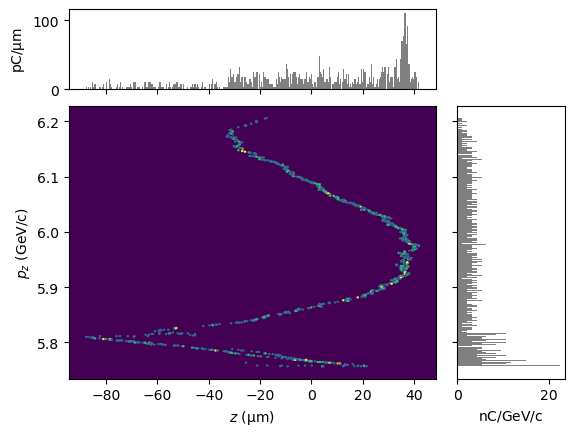

-22 -46
[-0.015400000000000028, 4.034166596549114e-05]


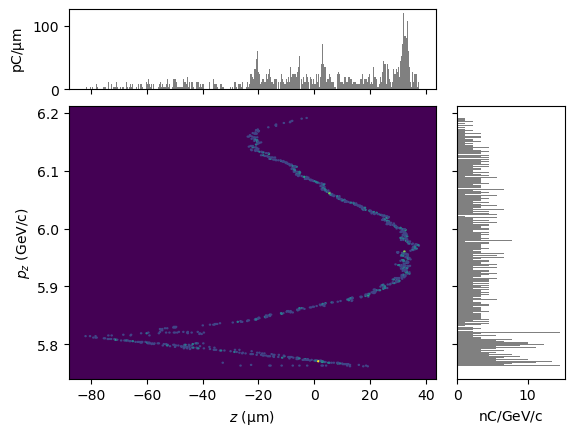

-22 -44
[-0.013300000000000041, 3.991519968050497e-05]


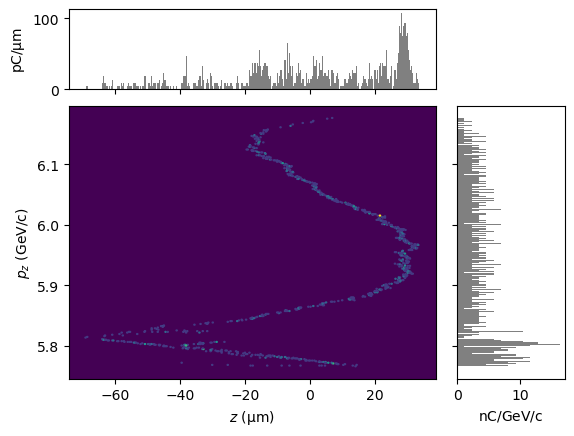

-22 -42
[-0.011000000000000055, 4.0670686108709115e-05]


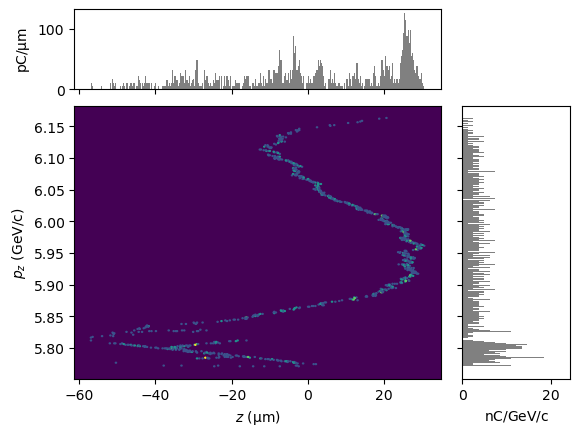

-22 -40
[-0.008700000000000069, 3.859178281994717e-05]


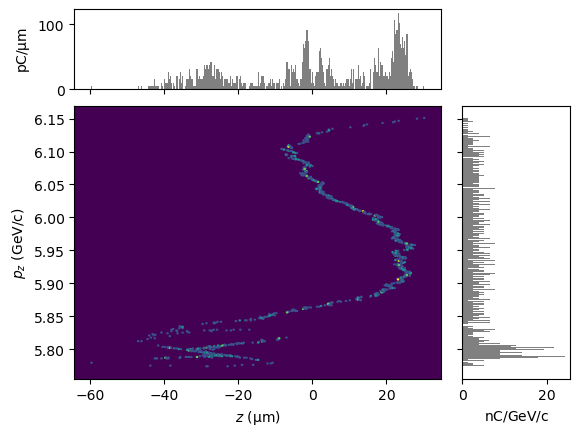

-22 -38
[-0.006300000000000083, 4.0799363661043106e-05]


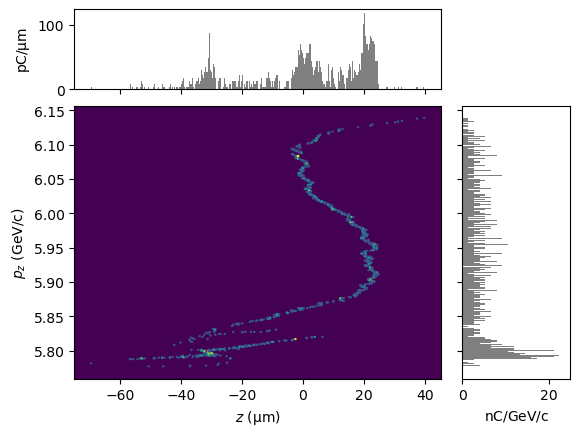

-22 -36
[-0.003900000000000098, 4.0062005638029835e-05]


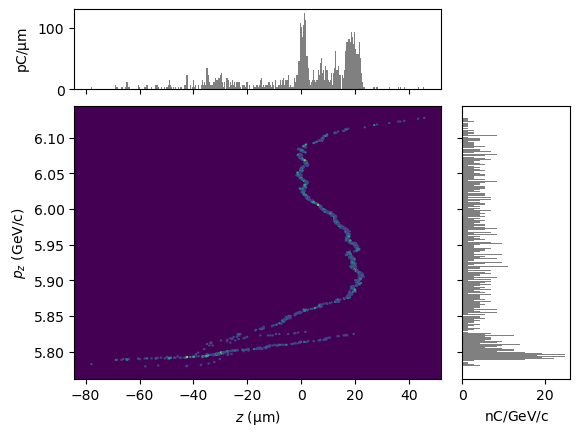

-22 -34
[-0.001400000000000113, 4.0975359218686e-05]


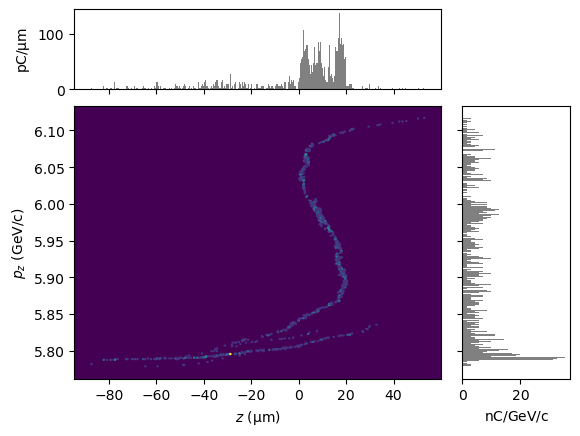

-22 -32
[0.0014999999999998695, 4.015936845404684e-05]


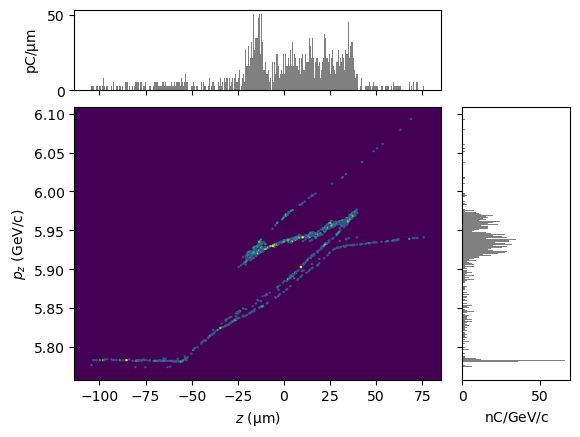

-22 -30
-22 -28
-22 -26
-22 -24
-22 -22
-22 -20
-22 -18
-22 -16
-22 -14
-22 -12
-22 -10
-22 -8
-22 -6
-22 -4
-22 -2
-20 -50
-20 -48
-20 -46
[-0.019100000000000006, 4.088079306952298e-05]


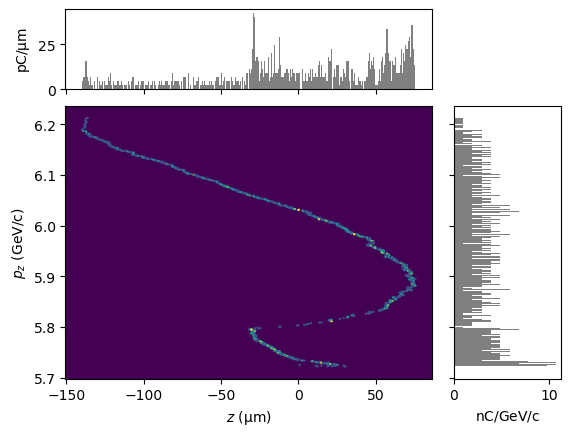

-20 -44
[-0.01680000000000002, 4.098128561008286e-05]


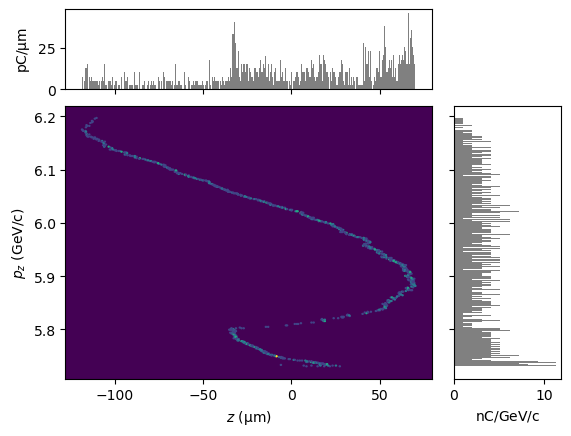

-20 -42
[-0.014400000000000034, 4.117609077054188e-05]


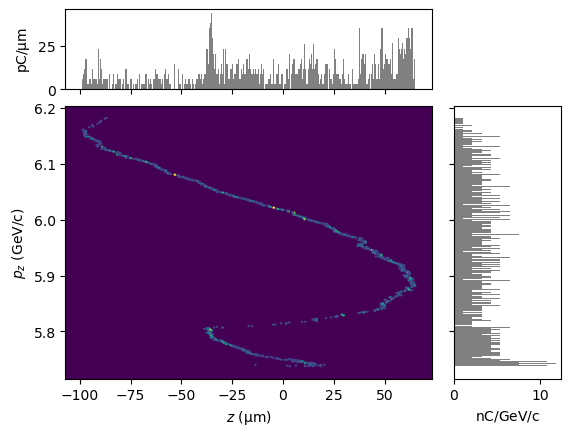

-20 -40
[-0.012000000000000049, 3.8352707441393255e-05]


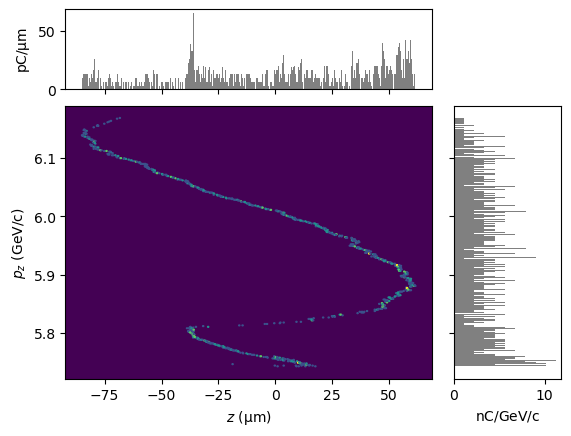

-20 -38
[-0.009300000000000065, 3.8361763922787584e-05]


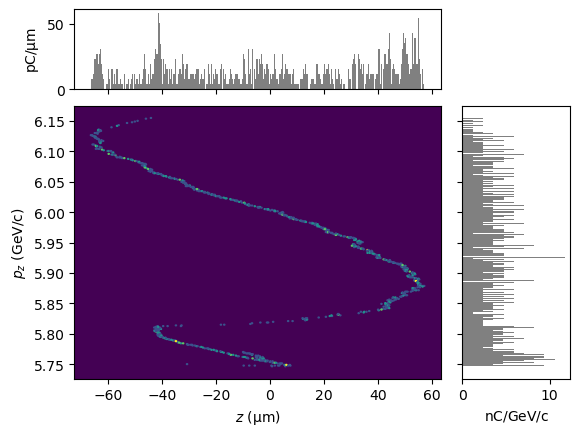

-20 -36
[-0.006500000000000082, 3.971813459036362e-05]


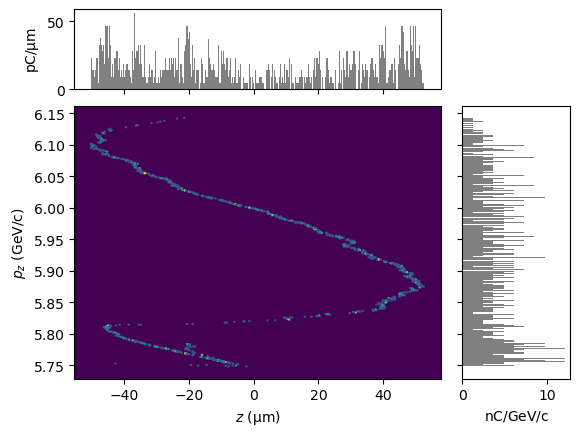

-20 -34
[-0.0038000000000000984, 3.8444440674624605e-05]


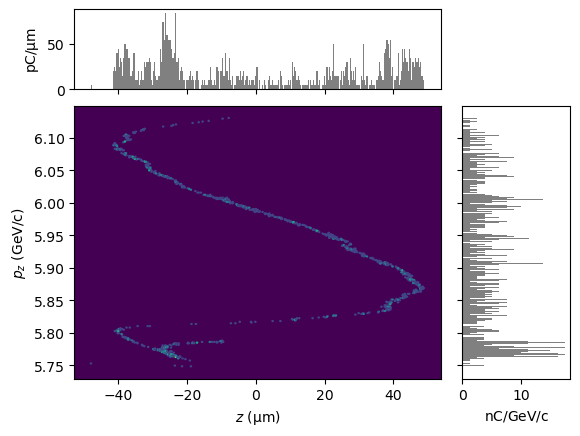

-20 -32
[-0.0011000000000001148, 4.100807320441058e-05]


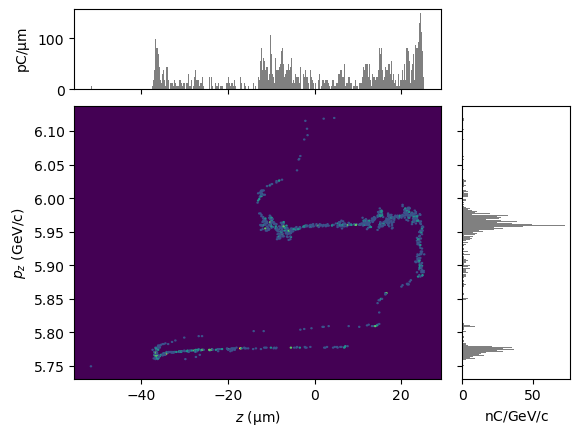

-20 -30
[0.002899999999999861, 3.955387136367283e-05]


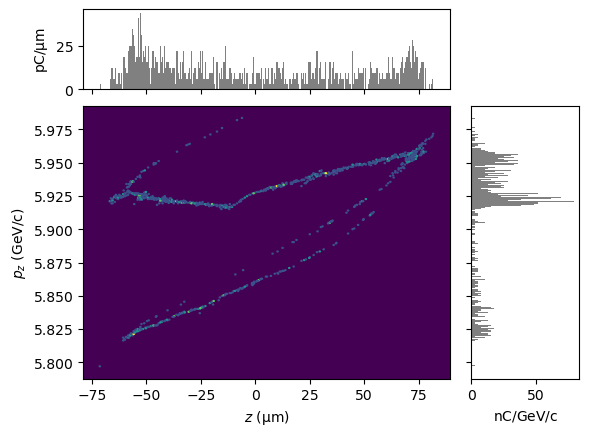

-20 -28
[0.018299999999999768, 3.979800241779906e-05]


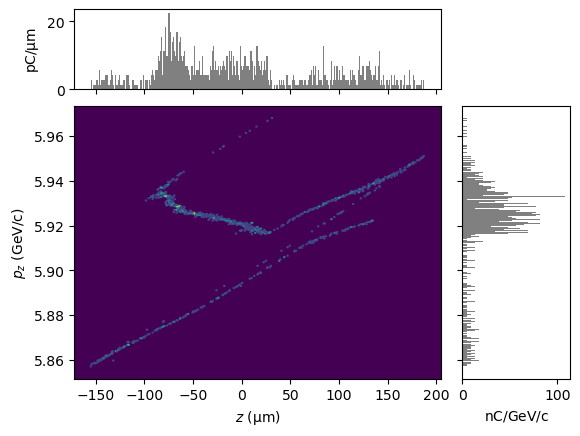

-20 -26
-20 -24
-20 -22
-20 -20
-20 -18
-20 -16
-20 -14
-20 -12
-20 -10
-20 -8
-20 -6
-20 -4
-20 -2
-18 -50
-18 -48
-18 -46
-18 -44
[-0.019200000000000005, 3.894842059494274e-05]


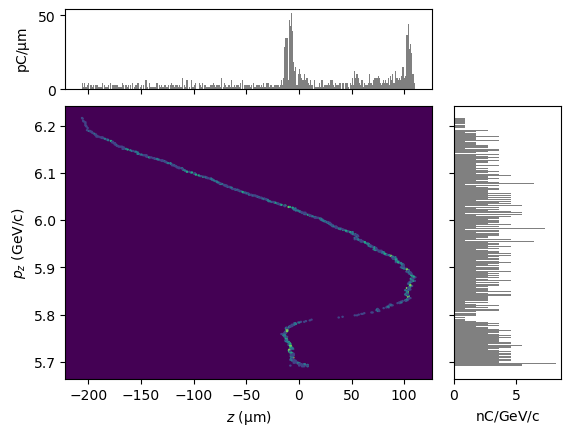

-18 -42
[-0.01680000000000002, 3.8692952203574725e-05]


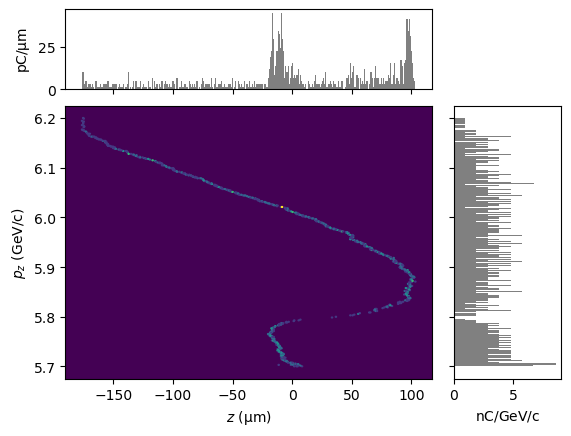

-18 -40
[-0.014300000000000035, 3.892687883739324e-05]


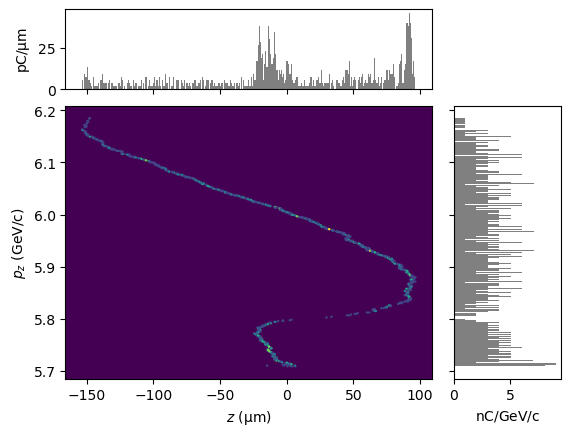

-18 -38
[-0.011600000000000051, 4.1830589690914816e-05]


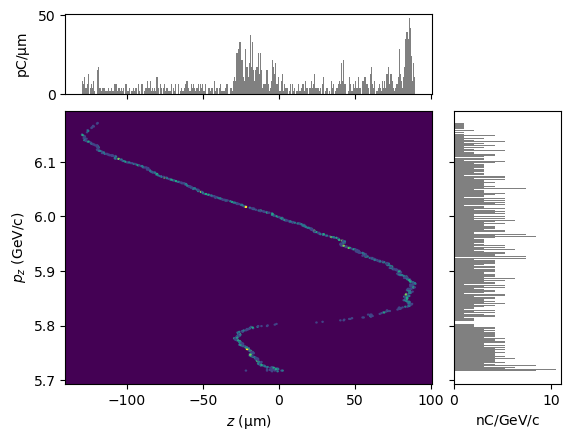

-18 -36
[-0.008900000000000068, 4.0050884834246425e-05]


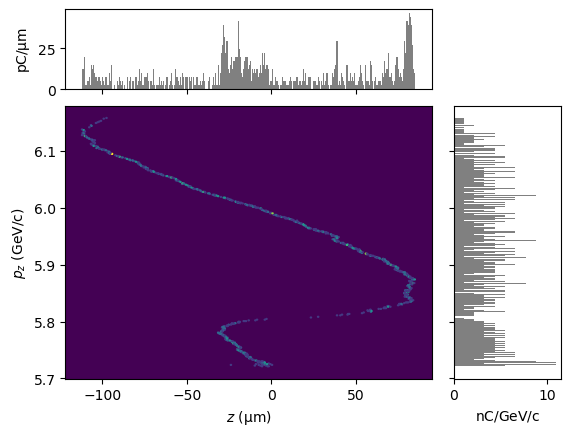

-18 -34
[-0.0061000000000000845, 3.8521931224449615e-05]


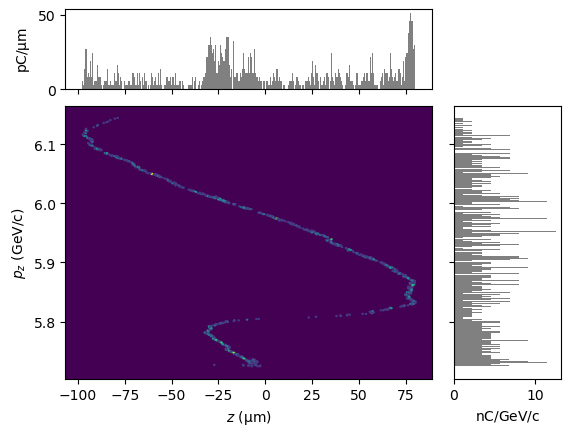

-18 -32
[-0.002700000000000105, 3.873423605109481e-05]


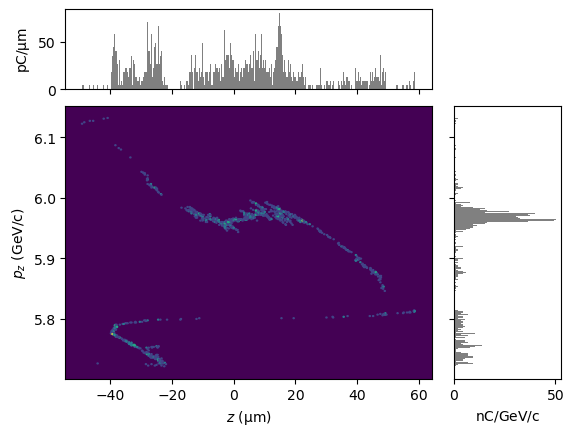

-18 -30
[-1.214306433183765e-16, 3.928395048315756e-05]


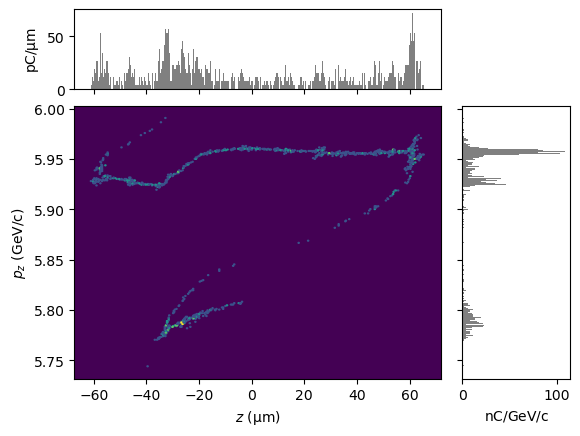

-18 -28
[0.007699999999999832, 4.023085601786205e-05]


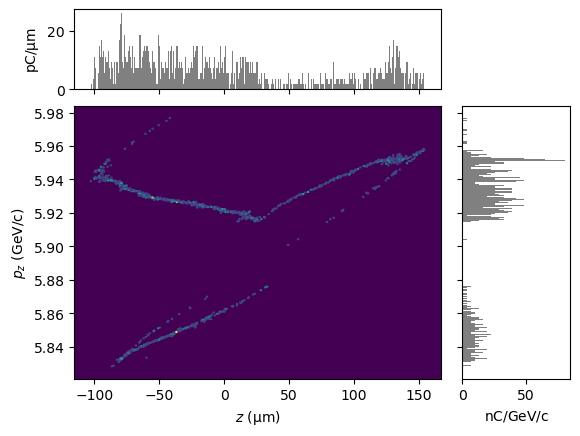

-18 -26
-18 -24
-18 -22
-18 -20
-18 -18
-18 -16
-18 -14
-18 -12
-18 -10
-18 -8
-18 -6
-18 -4
-18 -2
-16 -50
-16 -48
-16 -46
-16 -44
-16 -42
[-0.01850000000000001, 4.040876196075764e-05]


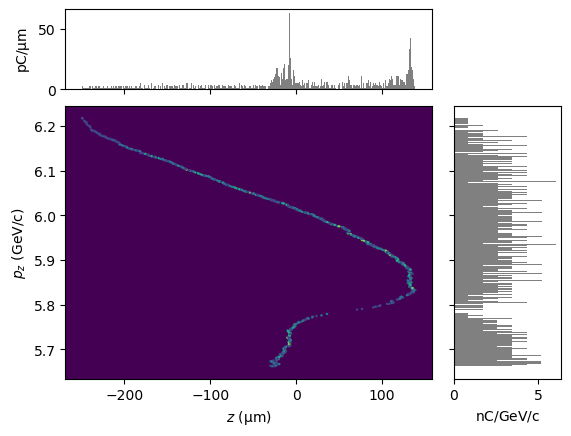

-16 -40
[-0.016000000000000025, 4.163119947040854e-05]


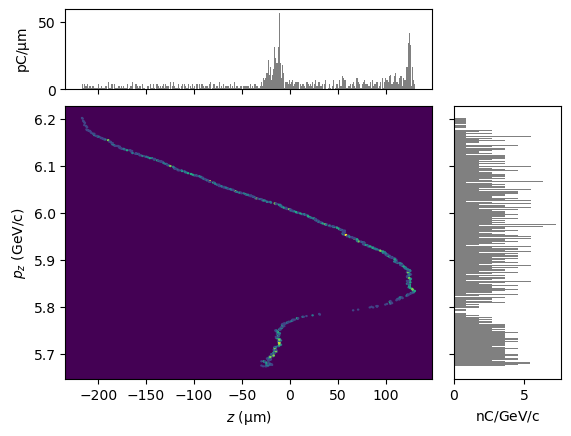

-16 -38
[-0.01340000000000004, 4.112071463856977e-05]


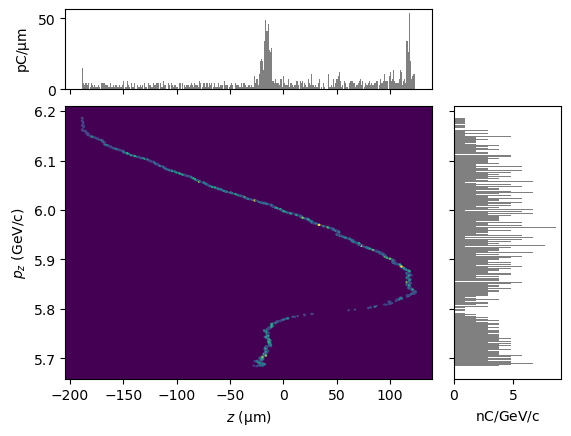

-16 -36
[-0.010700000000000057, 3.820010625745357e-05]


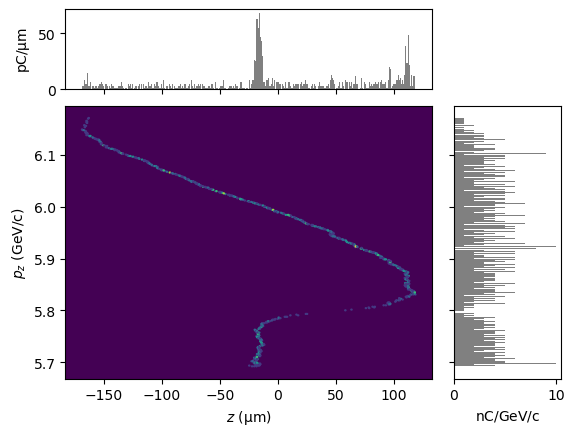

-16 -34
[-0.007800000000000074, 3.865716963399182e-05]


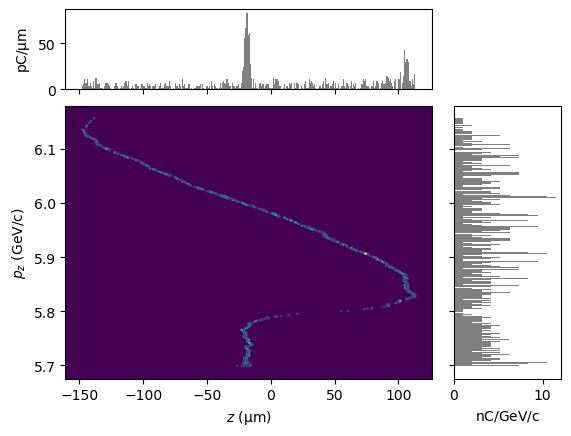

-16 -32
[-0.004100000000000097, 4.120027367677065e-05]


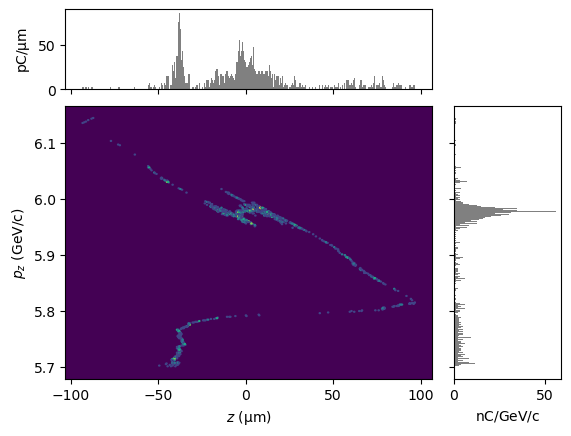

-16 -30
[-0.0013000000000001136, 3.990689720717508e-05]


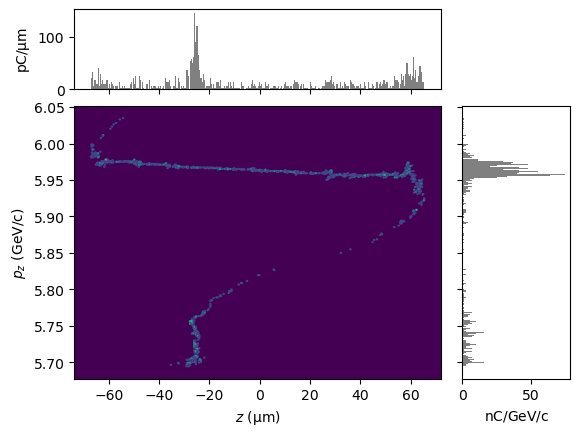

-16 -28
[0.0034999999999998574, 4.0080450509253684e-05]


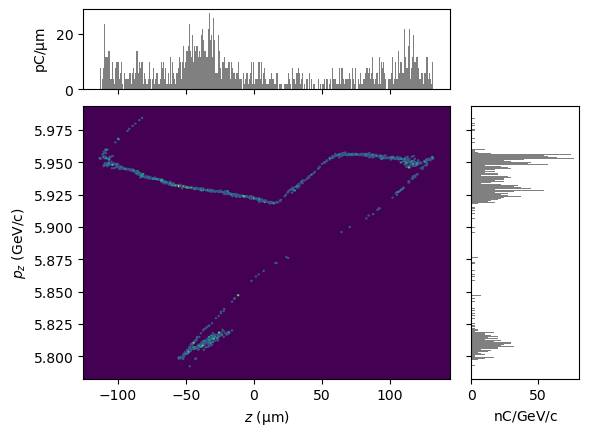

-16 -26
[0.013799999999999795, 4.0096072930632836e-05]


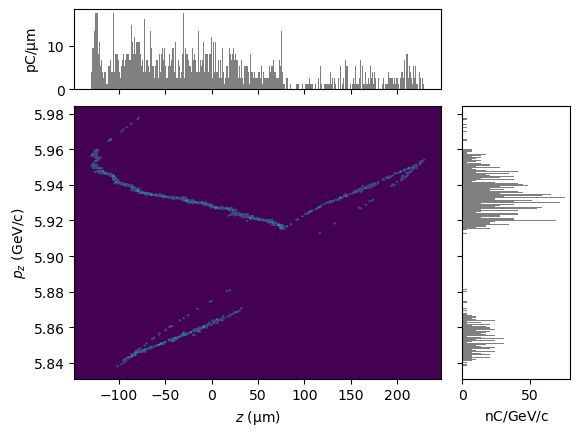

-16 -24
-16 -22
-16 -20
-16 -18
-16 -16
-16 -14
-16 -12
-16 -10
-16 -8
-16 -6
-16 -4
-16 -2
-14 -50
-14 -48
-14 -46
-14 -44
-14 -42
[-0.0199, 3.943636906865683e-05]


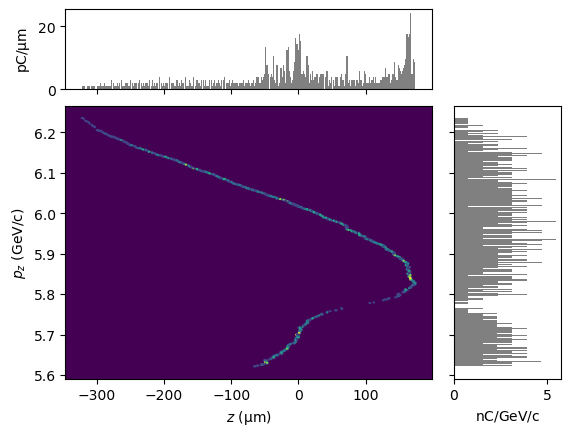

-14 -40
[-0.017400000000000016, 4.042227226309797e-05]


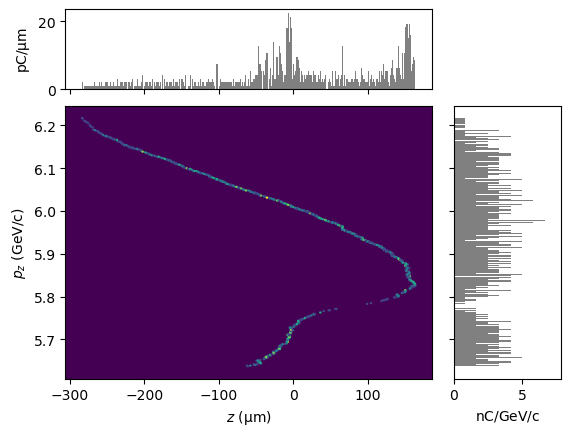

-14 -38
[-0.014800000000000032, 3.8886988658402263e-05]


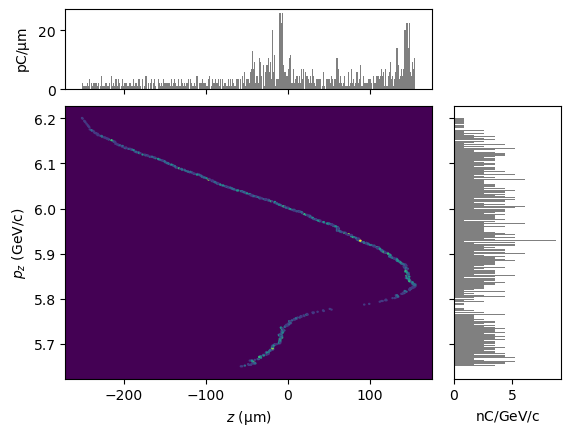

-14 -36
[-0.012000000000000049, 3.977072530712936e-05]


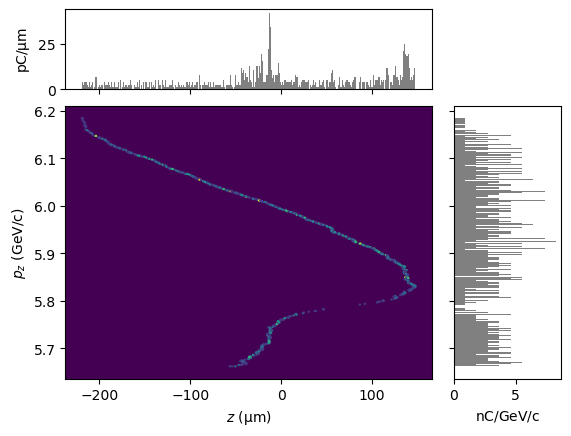

-14 -34
[-0.009100000000000066, 3.9682987786530065e-05]


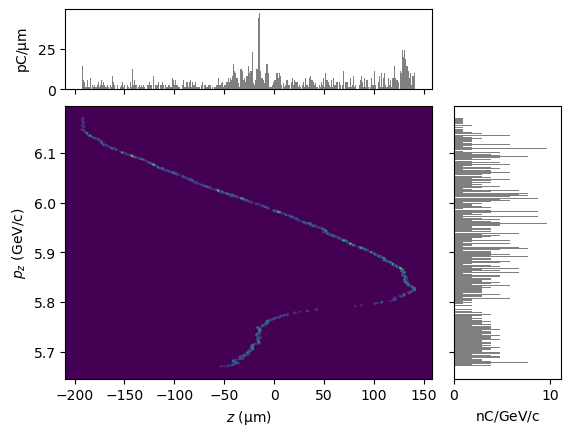

-14 -32
[-0.00520000000000009, 4.0132510358664836e-05]


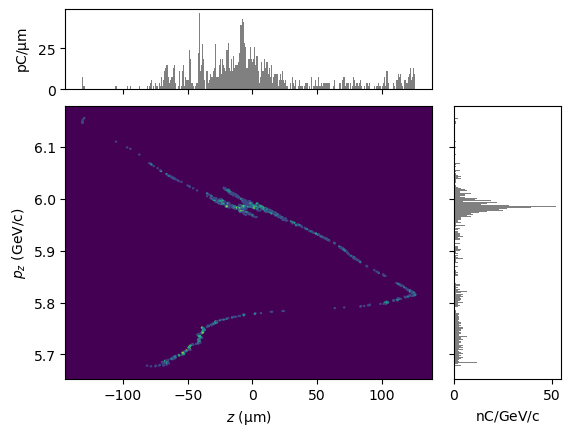

-14 -30
[-0.002400000000000107, 4.14804281617542e-05]


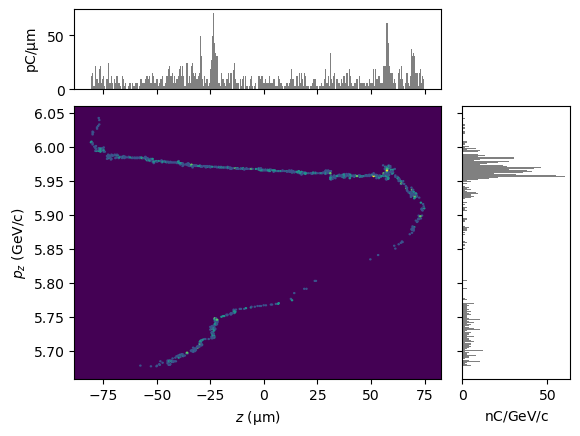

-14 -28
[0.0009999999999998725, 4.048157920564476e-05]


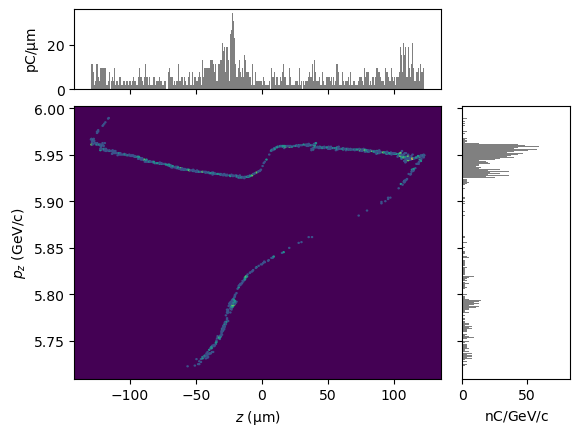

-14 -26
[0.008899999999999825, 3.969523349000262e-05]


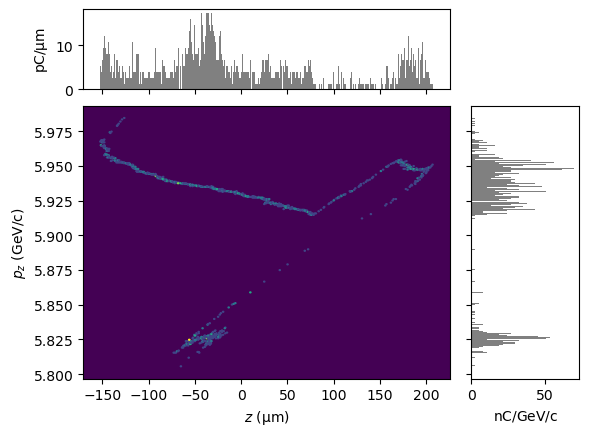

-14 -24
-14 -22
-14 -20
-14 -18
-14 -16
-14 -14
-14 -12
-14 -10
-14 -8
-14 -6
-14 -4
-14 -2
-12 -50
-12 -48
-12 -46
-12 -44
-12 -42
-12 -40
[-0.01860000000000001, 3.990979037931907e-05]


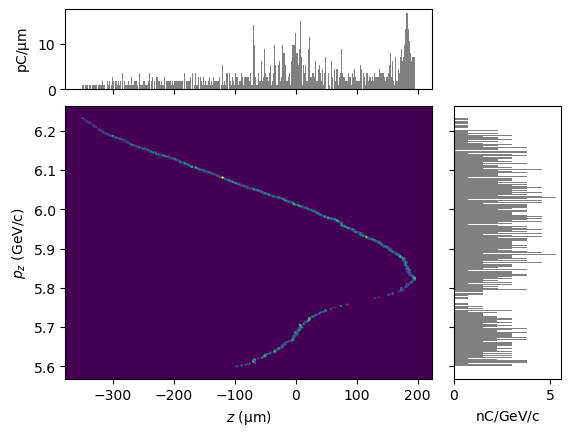

-12 -38
[-0.016000000000000025, 3.815892610528566e-05]


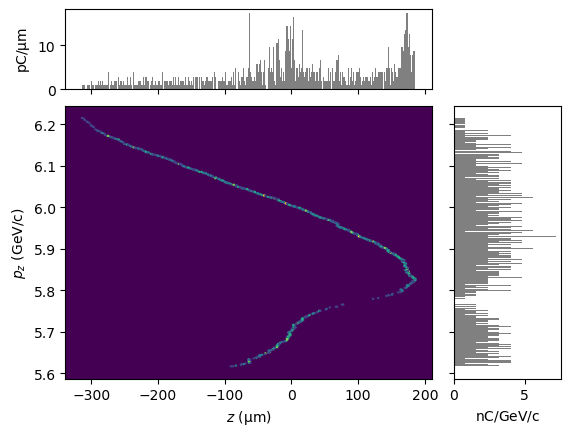

-12 -36
[-0.013200000000000042, 3.903022179510855e-05]


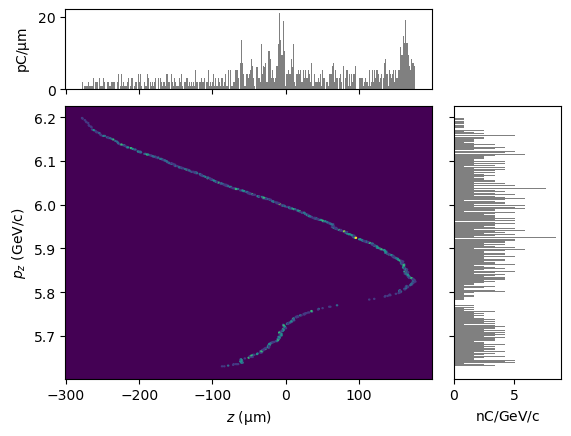

-12 -34
[-0.01020000000000006, 4.14929023274547e-05]


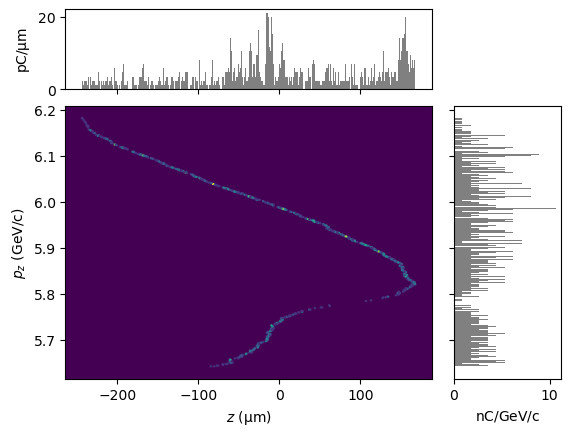

-12 -32
[-0.0061000000000000845, 4.0828311111604465e-05]


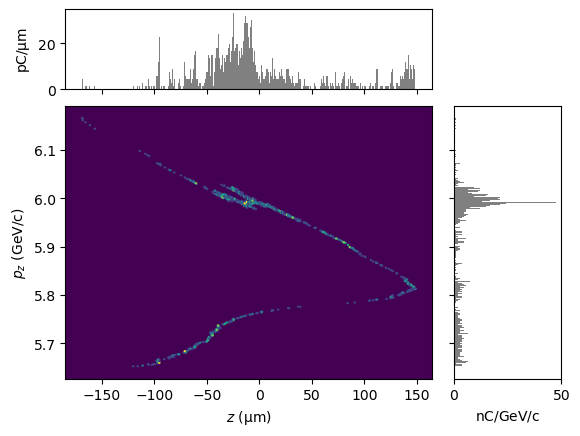

-12 -30
[-0.0035000000000001003, 3.787035221502511e-05]


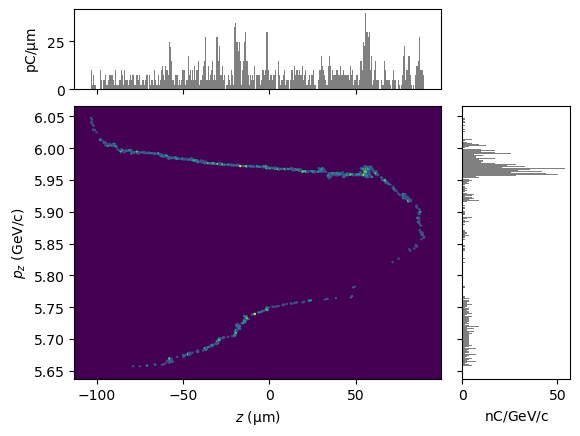

-12 -28
[-0.00010000000000012083, 4.150224937852861e-05]


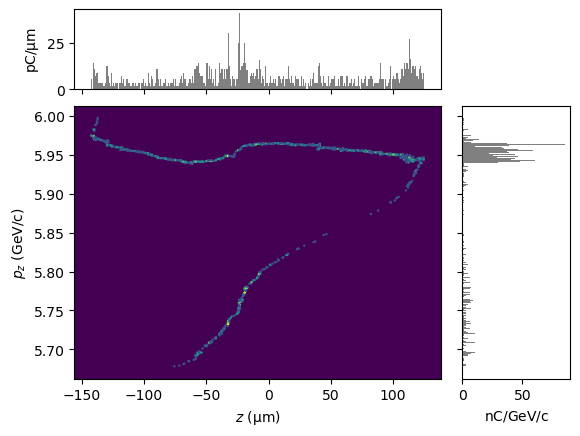

-12 -26
[0.006099999999999842, 4.09778476080896e-05]


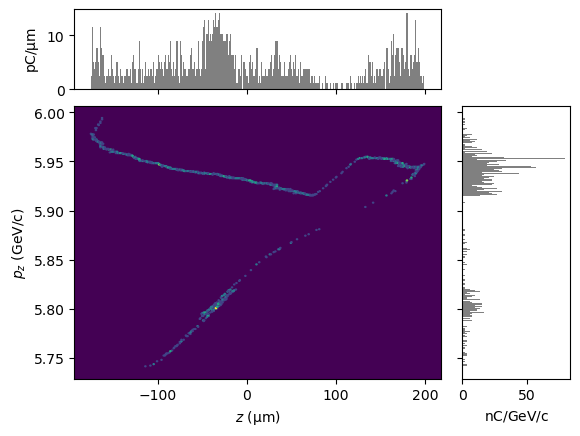

-12 -24
[0.016699999999999778, 4.005419346770712e-05]


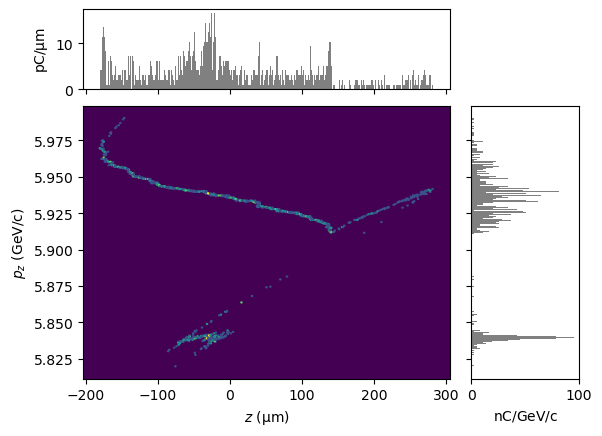

-12 -22
-12 -20
-12 -18
-12 -16
-12 -14
-12 -12
-12 -10
-12 -8
-12 -6
-12 -4
-12 -2
-10 -50
-10 -48
-10 -46
-10 -44
-10 -42
-10 -40
[-0.019600000000000003, 4.098474400924488e-05]


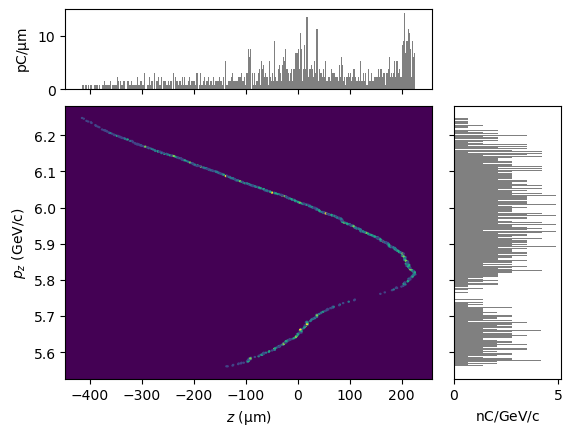

-10 -38
[-0.01700000000000002, 4.013480236229197e-05]


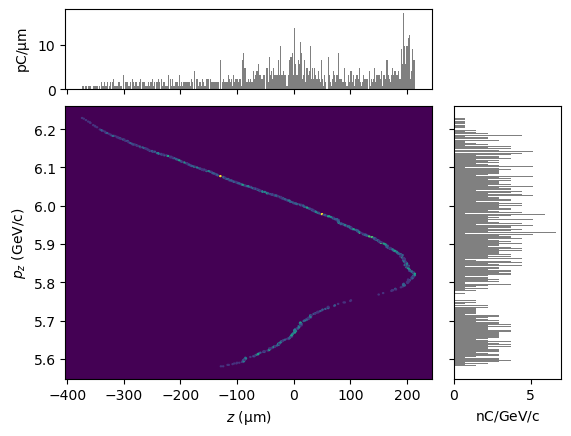

-10 -36
[-0.014200000000000036, 4.0772607438486374e-05]


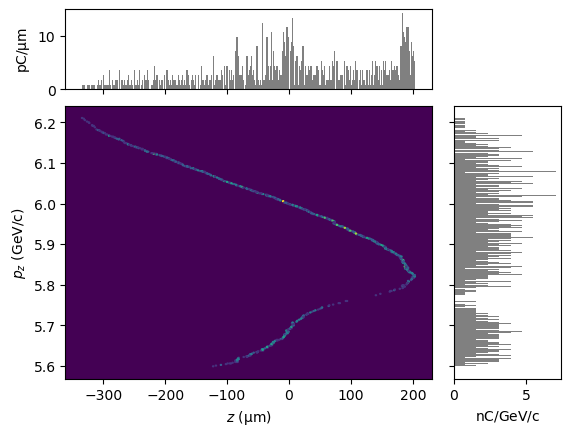

-10 -34
[-0.011300000000000053, 3.8022125263646294e-05]


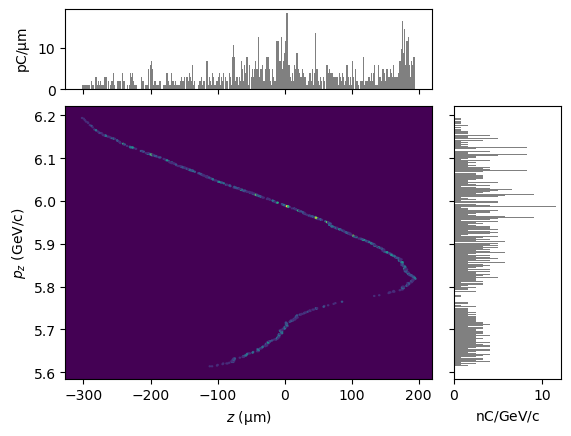

-10 -32
[-0.00690000000000008, 4.2006623849892756e-05]


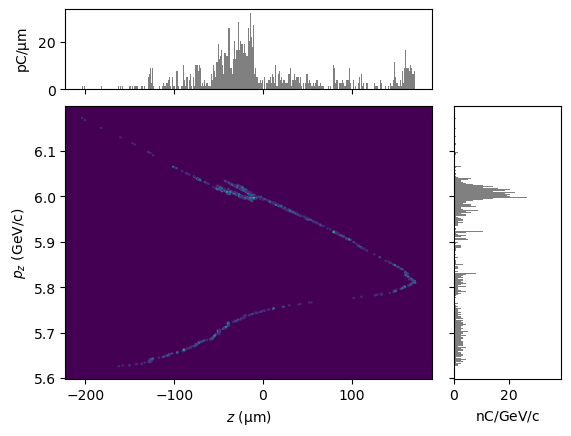

-10 -30
[-0.004400000000000095, 3.9545596622908015e-05]


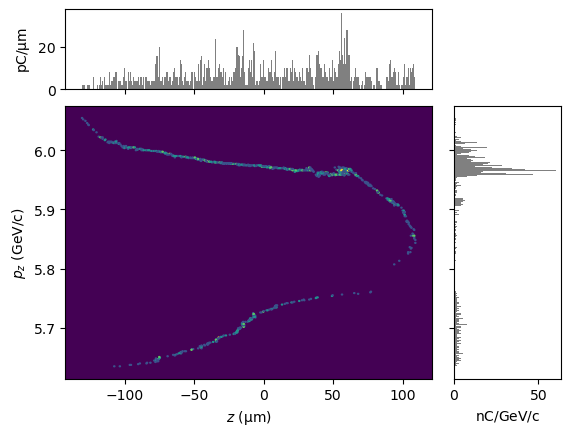

-10 -28
[-0.0010000000000001154, 4.057507960563461e-05]


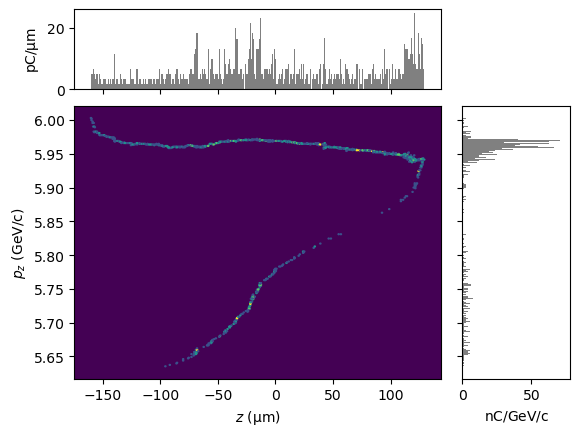

-10 -26
[0.004499999999999851, 3.945709974296742e-05]


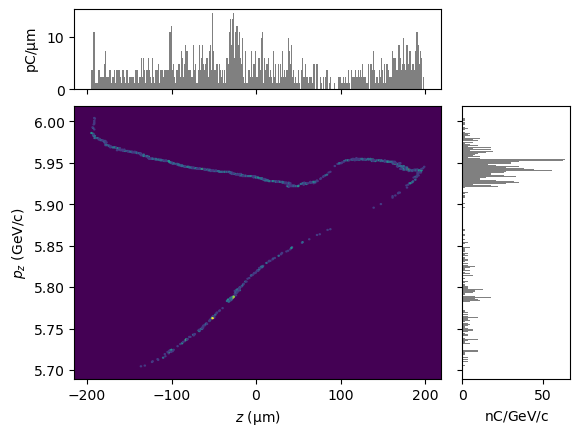

-10 -24
[0.0128999999999998, 4.001994017055771e-05]


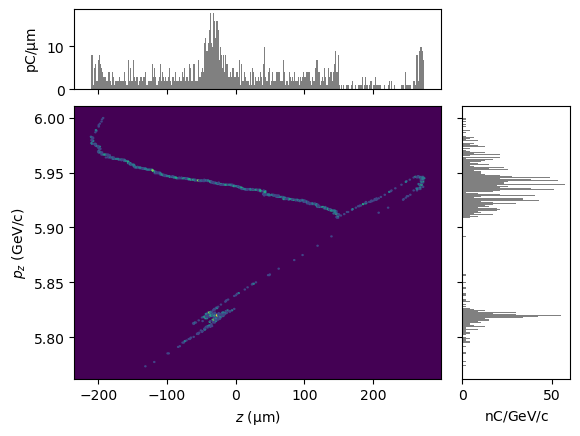

-10 -22
-10 -20
-10 -18
-10 -16
-10 -14
-10 -12
-10 -10
-10 -8
-10 -6
-10 -4
-10 -2
-8 -50
-8 -48
-8 -46
-8 -44
-8 -42
-8 -40
-8 -38
[-0.017900000000000013, 4.0922177263843834e-05]


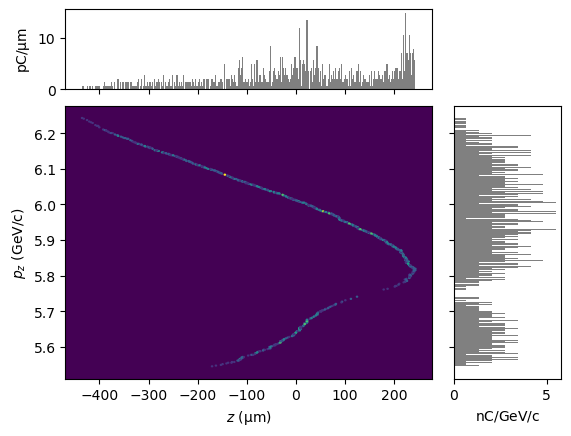

-8 -36
[-0.01510000000000003, 4.2198514477344615e-05]


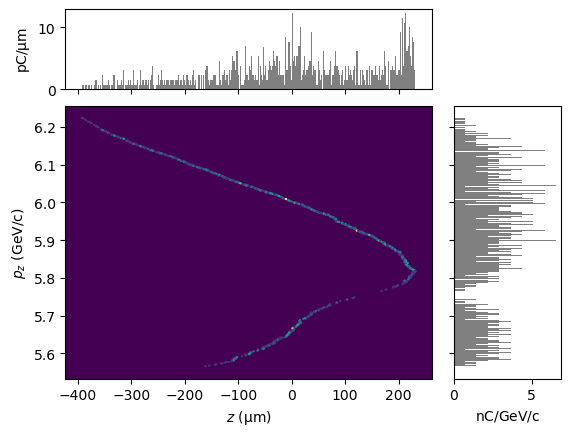

-8 -34
[-0.012200000000000048, 3.87970985610567e-05]


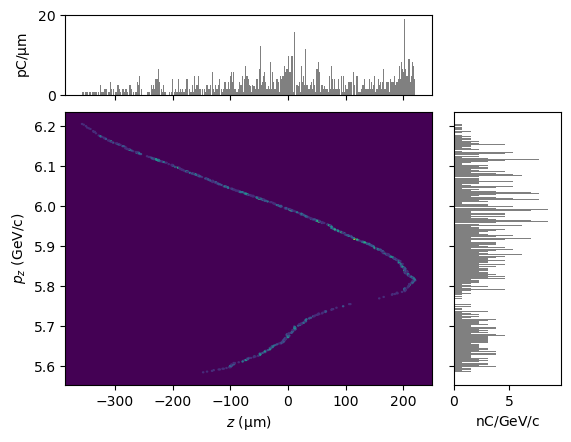

-8 -32
[-0.007700000000000075, 3.828713083763342e-05]


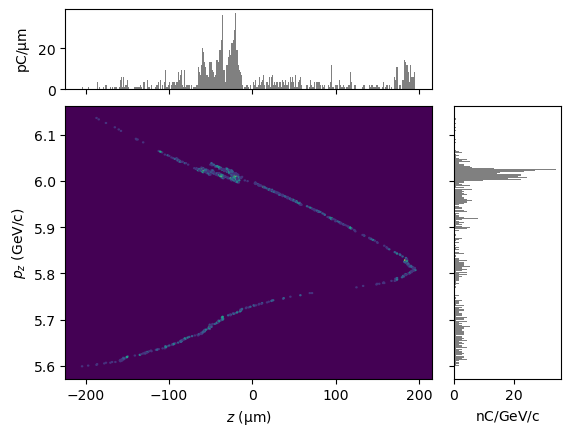

-8 -30
[-0.00520000000000009, 4.012889637656449e-05]


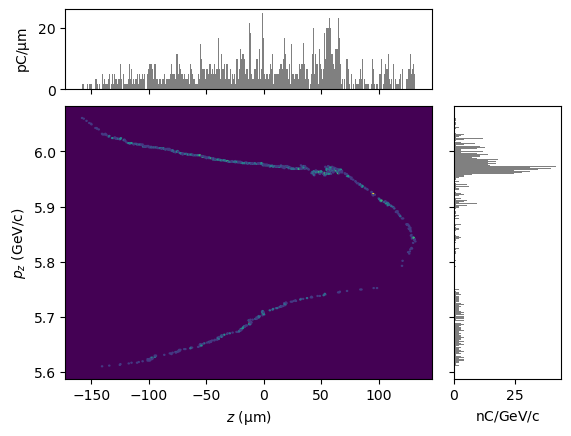

-8 -28
[-0.0018000000000001105, 3.778715632990446e-05]


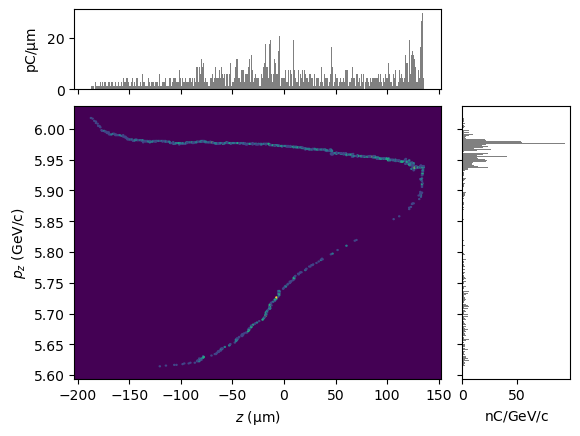

-8 -26
[0.0029999999999998604, 3.895316725219152e-05]


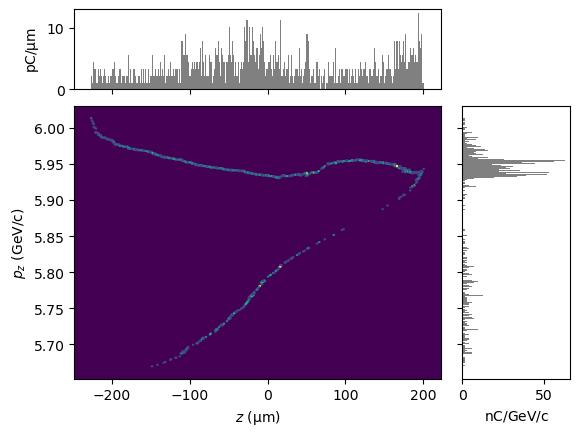

-8 -24
[0.010799999999999813, 3.9772150427138734e-05]


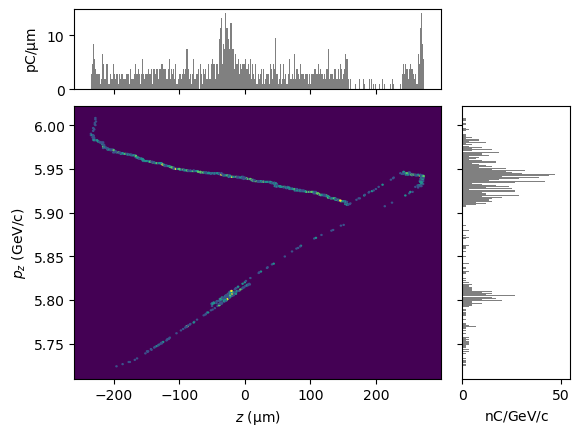

-8 -22
-8 -20
-8 -18
-8 -16
-8 -14
-8 -12
-8 -10
-8 -8
-8 -6
-8 -4
-8 -2
-6 -50
-6 -48
-6 -46
-6 -44
-6 -42
-6 -40
-6 -38
[-0.018800000000000008, 3.728166689710114e-05]


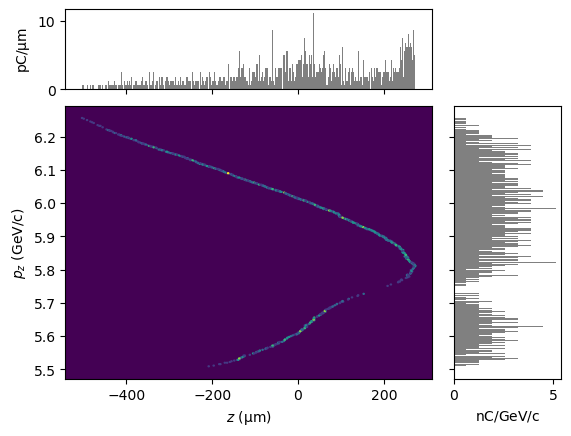

-6 -36
[-0.016000000000000025, 3.932019457297478e-05]


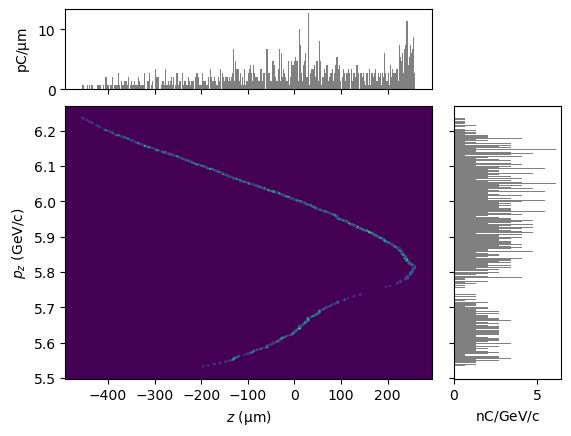

-6 -34
[-0.013000000000000043, 4.151649568102651e-05]


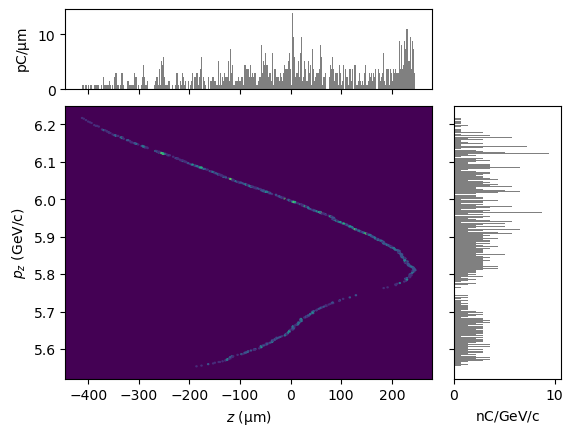

-6 -32
[-0.00840000000000007, 3.8842844934852856e-05]


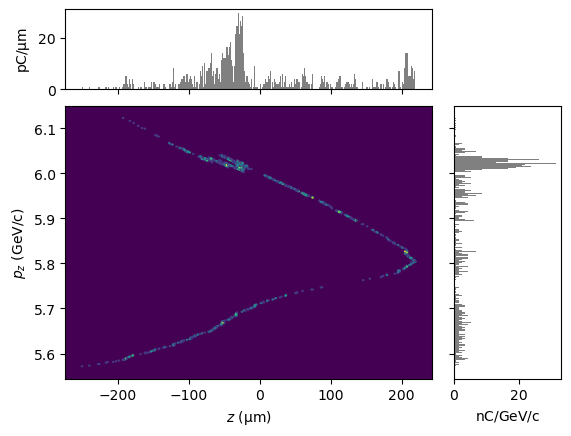

-6 -30
[-0.006000000000000085, 3.8732340980913706e-05]


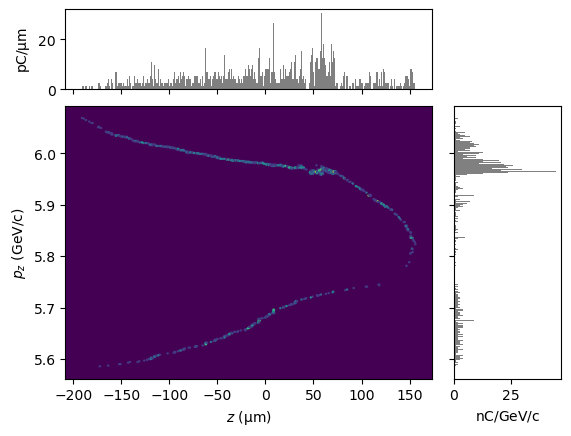

-6 -28
[-0.002400000000000107, 4.0303269305348147e-05]


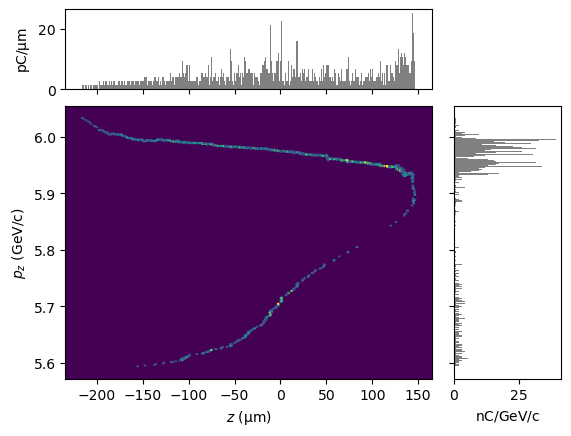

-6 -26
[0.0017999999999998677, 3.8908989461715376e-05]


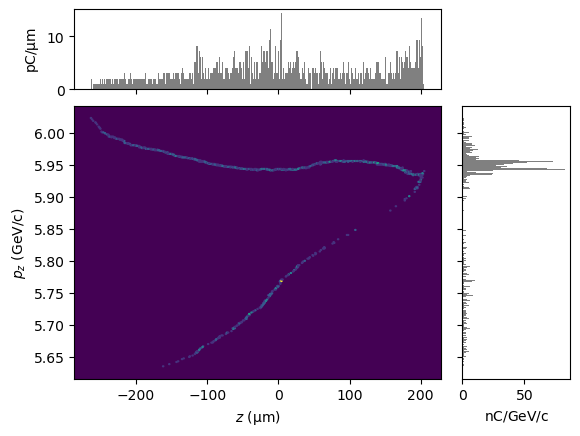

-6 -24
[0.009499999999999821, 4.089372027004704e-05]


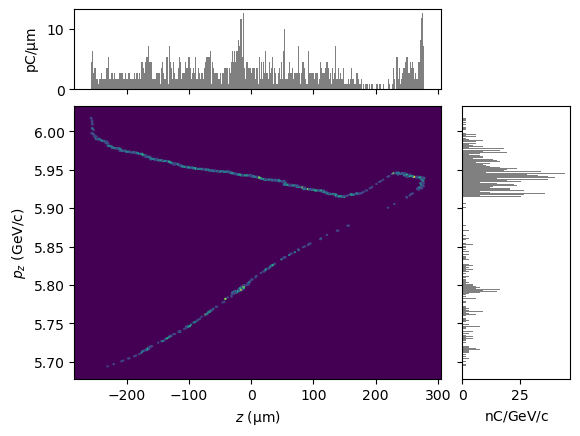

-6 -22
[0.019299999999999762, 3.97401118036713e-05]


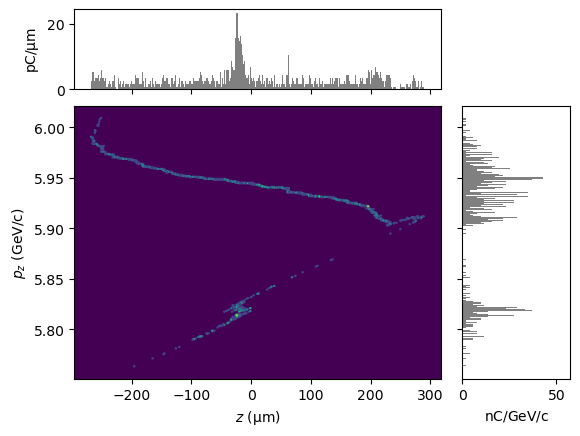

-6 -20
-6 -18
-6 -16
-6 -14
-6 -12
-6 -10
-6 -8
-6 -6
-6 -4
-6 -2
-4 -50
-4 -48
-4 -46
-4 -44
-4 -42
-4 -40
-4 -38
[-0.019500000000000003, 4.178089529332358e-05]


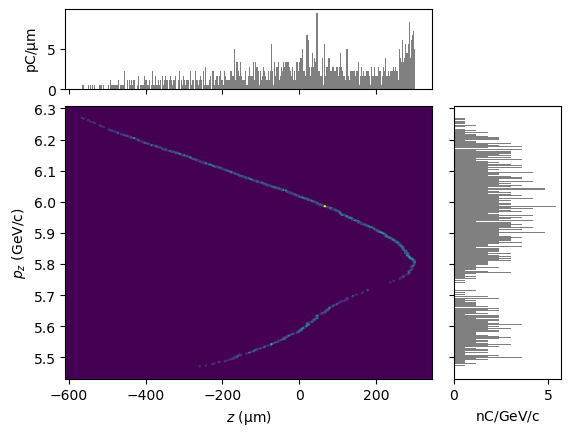

-4 -36
[-0.01680000000000002, 3.7315241970408124e-05]


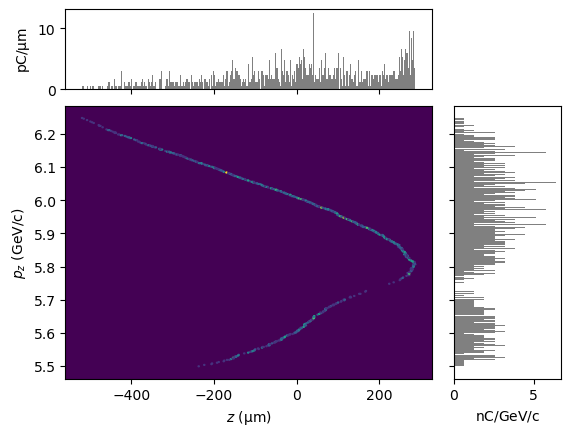

-4 -34
[-0.013800000000000038, 4.009387100879888e-05]


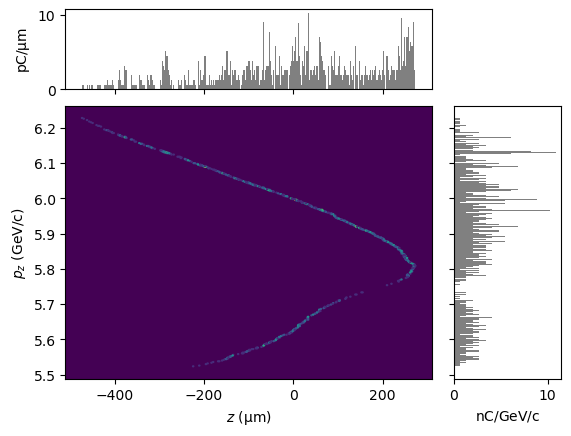

-4 -32
[-0.009100000000000066, 3.702585533927797e-05]


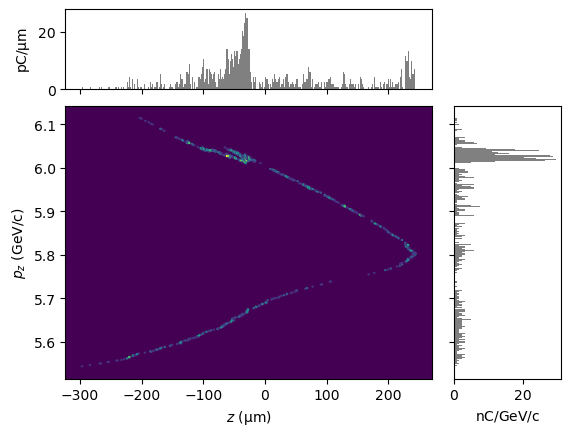

-4 -30
[-0.006700000000000081, 3.9409868915627684e-05]


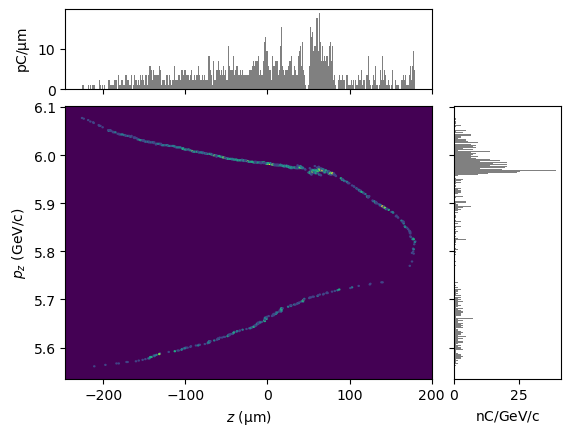

-4 -28
[-0.0030000000000001033, 4.038375572625482e-05]


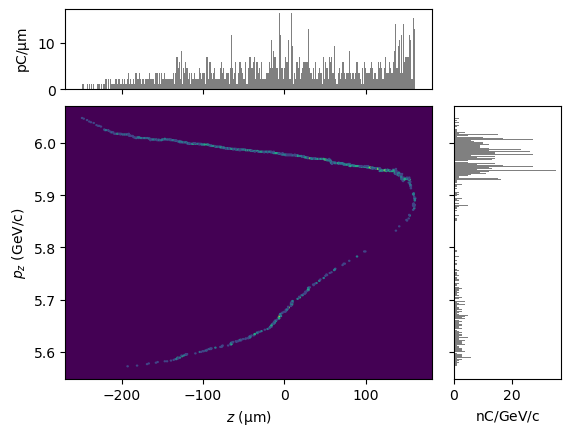

-4 -26
[0.0008999999999998731, 3.853869411997575e-05]


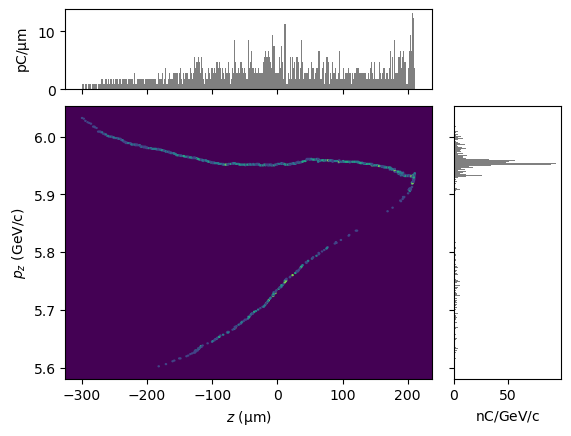

-4 -24
[0.007699999999999832, 3.894029766611077e-05]


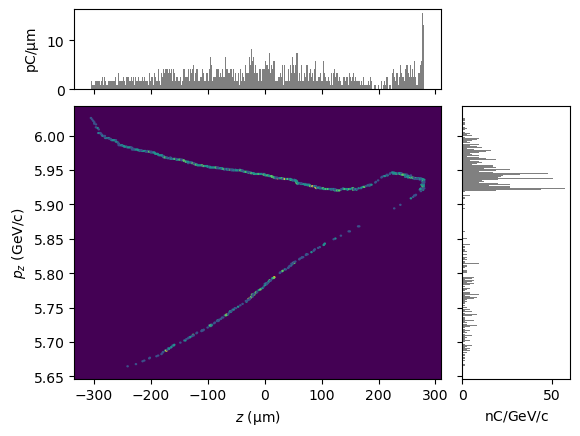

-4 -22
[0.017299999999999774, 4.1100289753695236e-05]


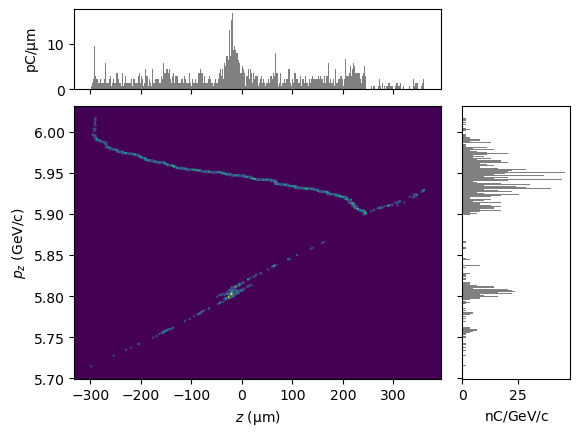

-4 -20
-4 -18
-4 -16
-4 -14
-4 -12
-4 -10
-4 -8
-4 -6
-4 -4
-4 -2
-2 -50
-2 -48
-2 -46
-2 -44
-2 -42
-2 -40
-2 -38
-2 -36
[-0.017500000000000016, 3.865135359663939e-05]


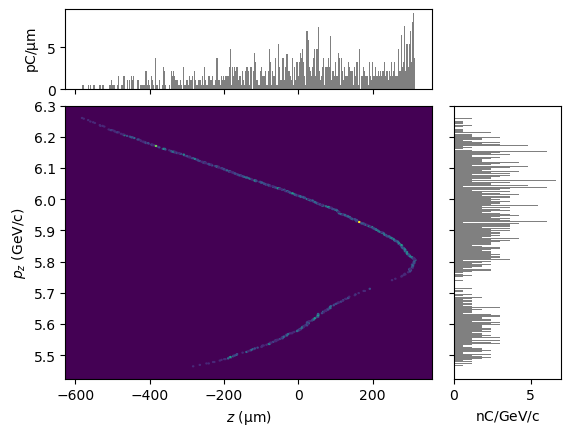

-2 -34
[-0.014500000000000034, 4.278821547460955e-05]


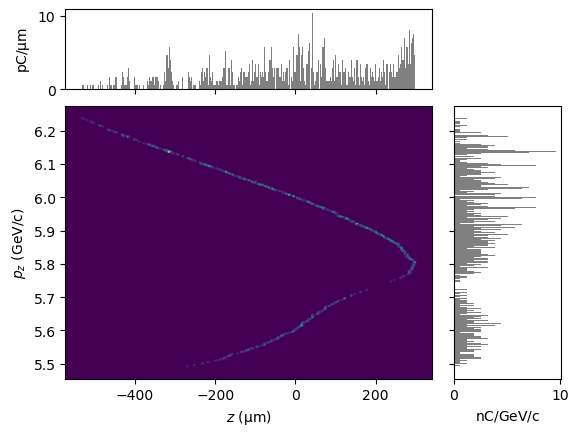

-2 -32
[-0.009700000000000063, 4.158348198895977e-05]


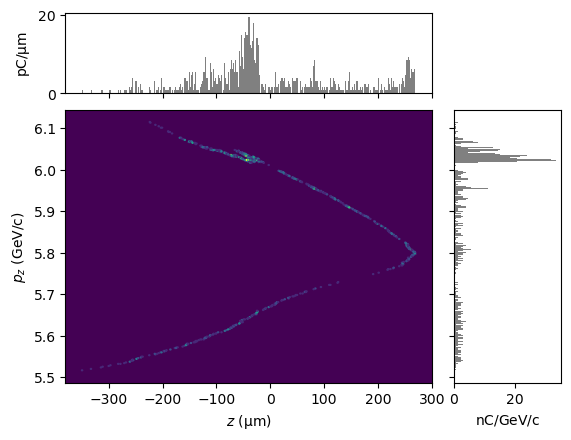

-2 -30
[-0.007400000000000077, 3.7902223054051565e-05]


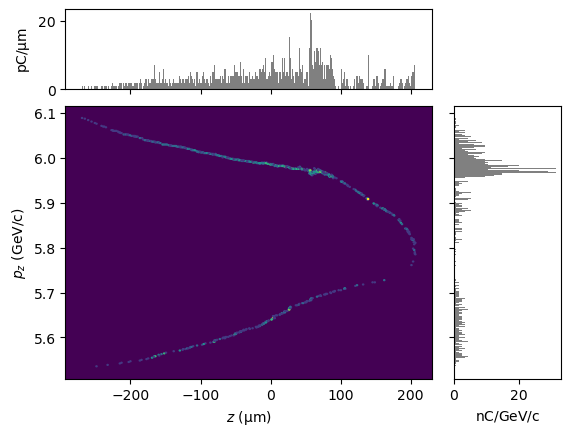

-2 -28
[-0.0036000000000000996, 4.012635221239763e-05]


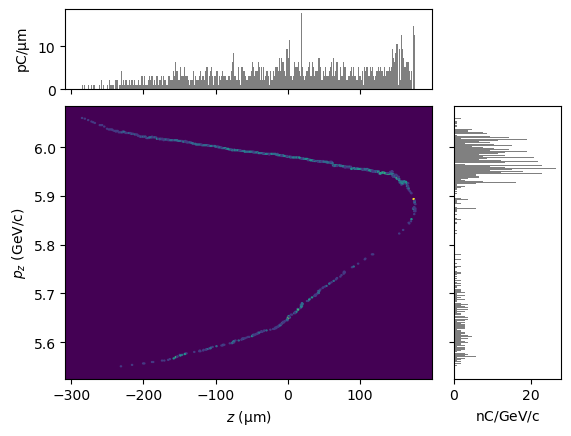

-2 -26
[0.00019999999999987736, 4.020955488732112e-05]


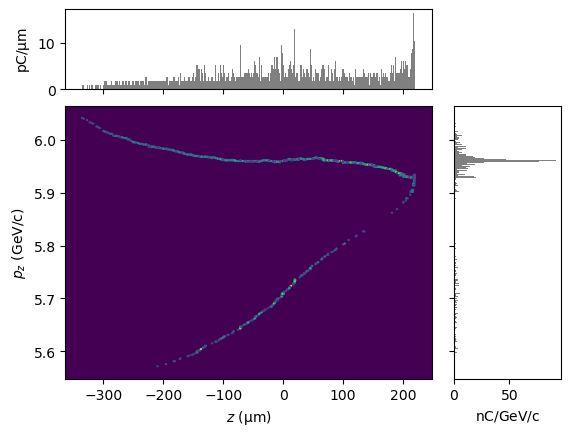

-2 -24
[0.006499999999999839, 3.9449977216974354e-05]


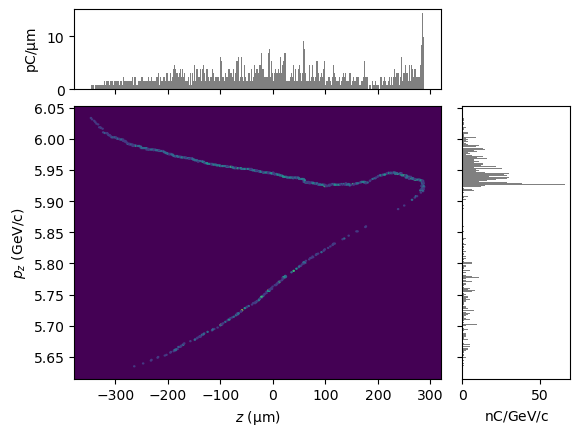

-2 -22
[0.015799999999999783, 3.963273268924374e-05]


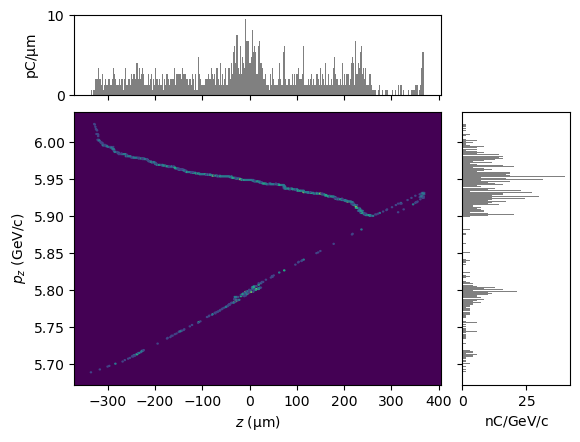

-2 -20
-2 -18
-2 -16
-2 -14
-2 -12
-2 -10
-2 -8
-2 -6
-2 -4
-2 -2


In [8]:
for L1PhaseSet in np.arange(-40, 0, 2):
    for L2PhaseSet in np.arange(-50, 0 , 2):
        print(L1PhaseSet, L2PhaseSet)
        
        
        #Set phases and track to BC20
        
        activeSettings = importedDefaultSettings | { "L1PhaseSet" : L1PhaseSet, "L2PhaseSet" : L2PhaseSet }
        
        setLattice(tao, **activeSettings)
        trackBeam(tao, trackEnd = "BEGBC20", **activeSettings)
        P = getBeamAtElement(tao, "BEGBC20")
        
        results = []

        #Find optimal R56
        
        for R56Set in np.arange( -20e-3, 20e-3, 0.1e-3):
            PMod = P.copy()
            
            meanPz = np.mean( PMod.pz ) 
            PMod.z = PMod.z + ( R56Set ) * ( PMod.pz - meanPz ) / meanPz
            
            #display(plotMod(PMod, 'z', 'pz', bins=300))
            #plt.clf()
            
            PDrive, PWitness = getDriverAndWitness(PMod)
            #print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) )
        
            results.append( [ R56Set, np.median(PDrive.z) - np.median(PWitness.z) ] ) 
        
        targetSpacing = 40e-6
        bestResult = min(results, key=lambda x: ( x[1] - targetSpacing ) ** 2)

        
        bestR56, bestSpacing = bestResult

        #Only show results which are within the allowed R56 range
        if abs(bestSpacing - targetSpacing) < 10e-6: 
            PMod = P.copy()
                
            meanPz = np.mean( PMod.pz ) 
            PMod.z = PMod.z + ( bestR56 ) * ( PMod.pz - meanPz ) / meanPz
    
            print(bestResult)
            display(plotMod(PMod, 'z', 'pz', bins=300))
            plt.clf()